# Count of hoy many times in those 3 weeks we had outliers of the pm10 and pm25
# Did it matched with the coldest days? 




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('C:/Users/Jose Fernando Barros/Desktop/Dotta/sustainability/group project/data/Alldata_only.xlsx')

In [3]:
df.shape

(232267, 12)

In [4]:
df.head()

,timestamp(Europe/Rome),pm10,score,temp(¬∞F),humid,co2,voc,pm25,noise,light,Temperature in C,Room
0,2024-01-01 00:00:00,5.1,99.0,73.7,36.2,406.0,29.0,4.1,52.3,0.0,23.166667,Modullare
1,2024-01-01 00:00:00,7.8,98.2,70.1,39.1,414.8,132.3,6.8,41.3,0.0,21.166667,Fuoco
2,2024-01-01 00:05:00,5.1,99.0,73.7,36.1,405.9,28.9,4.1,52.1,0.0,23.166667,Modullare
3,2024-01-01 00:05:00,7.5,98.3,70.1,39.2,415.9,130.0,6.5,41.3,0.0,21.166667,Fuoco
4,2024-01-01 00:10:00,5.0,99.0,73.6,36.2,409.5,27.6,4.0,52.2,0.0,23.111111,Modullare


In [5]:
df.isnull().sum()

timestamp(Europe/Rome)       0
pm10                      4884
score                        0
temp(¬∞F)                    0
humid                        0
co2                          0
voc                          0
pm25                         0
noise                        0
light                        0
Temperature in C             0
Room                         0
dtype: int64

In [6]:
# Check for whitespace strings
df.apply(lambda x: (x.astype(str).str.isspace()).sum() if x.dtype == 'object' else 0)

timestamp(Europe/Rome)    0
pm10                      0
score                     0
temp(¬∞F)                 0
humid                     0
co2                       0
voc                       0
pm25                      0
noise                     0
light                     0
Temperature in C          0
Room                      0
dtype: int64

In [7]:
# Check for empty strings
df.eq('').sum()


timestamp(Europe/Rome)    0
pm10                      0
score                     0
temp(¬∞F)                 0
humid                     0
co2                       0
voc                       0
pm25                      0
noise                     0
light                     0
Temperature in C          0
Room                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232267 entries, 0 to 232266
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   timestamp(Europe/Rome)  232267 non-null  datetime64[ns]
 1   pm10                    227383 non-null  float64       
 2   score                   232267 non-null  float64       
 3   temp(¬∞F)               232267 non-null  float64       
 4   humid                   232267 non-null  float64       
 5   co2                     232267 non-null  float64       
 6   voc                     232267 non-null  float64       
 7   pm25                    232267 non-null  float64       
 8   noise                   232267 non-null  float64       
 9   light                   232267 non-null  float64       
 10  Temperature in C        232267 non-null  float64       
 11  Room                    232267 non-null  object        
dtypes: datetime64[ns](1), float64(

In [9]:
df_pm10 = df.filter(['pm10'], axis=1)
print(df_pm10.shape)
print(df_pm10.head(5))

(232267, 1)
   pm10
0   5.1
1   7.8
2   5.1
3   7.5
4   5.0


In [10]:
# Creating a Dataframe meant for analyzing PM25, using other important related variables
df_pm25 = df[['pm25', 'timestamp(Europe/Rome)', 'score', 'Room']].copy()
print(df_pm25.shape)
print(df_pm25.head(5))

(232267, 4)
   pm25 timestamp(Europe/Rome)  score       Room
0   4.1    2024-01-01 00:00:00   99.0  Modullare
1   6.8    2024-01-01 00:00:00   98.2      Fuoco
2   4.1    2024-01-01 00:05:00   99.0  Modullare
3   6.5    2024-01-01 00:05:00   98.3      Fuoco
4   4.0    2024-01-01 00:10:00   99.0  Modullare


In [11]:
# Get min and max values for pm25
print("Minimum PM2.5:", df['pm25'].min())
print("Maximum PM2.5:", df['pm25'].max())

Minimum PM2.5: 0.0
Maximum PM2.5: 1000.0


In [12]:
# Get top 15 highest PM2.5 values with their corresponding timestamps and rooms
df_pm25_top15 = df_pm25.nlargest(15, 'pm25')
print("Top 15 highest PM2.5 readings:")
print(df_pm25_top15)

Top 15 highest PM2.5 readings:
         pm25 timestamp(Europe/Rome)  score   Room
12991  1000.0    2024-01-23 13:15:00    1.2  Fuoco
13011  1000.0    2024-01-23 14:05:00    3.8  Fuoco
13013  1000.0    2024-01-23 14:10:00    3.3  Fuoco
13015  1000.0    2024-01-23 14:15:00    2.8  Fuoco
13017  1000.0    2024-01-23 14:20:00    3.9  Fuoco
13055  1000.0    2024-01-23 15:55:00    7.0  Fuoco
13191  1000.0    2024-01-23 21:35:00    2.6  Fuoco
13193  1000.0    2024-01-23 21:40:00    2.9  Fuoco
13195  1000.0    2024-01-23 21:45:00    3.0  Fuoco
13197  1000.0    2024-01-23 21:50:00    3.0  Fuoco
13199  1000.0    2024-01-23 21:55:00    3.0  Fuoco
13201  1000.0    2024-01-23 22:00:00    3.0  Fuoco
13203  1000.0    2024-01-23 22:05:00    3.0  Fuoco
13205  1000.0    2024-01-23 22:10:00    3.0  Fuoco
13207  1000.0    2024-01-23 22:15:00    3.1  Fuoco


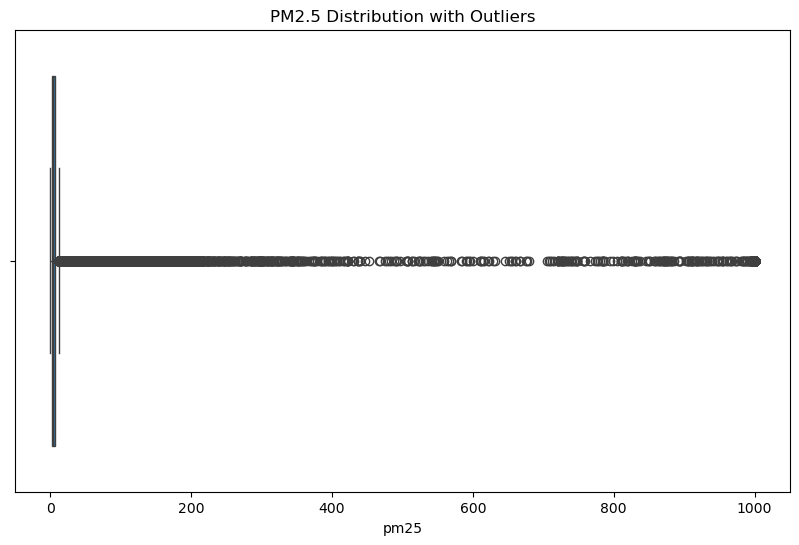

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pm25'])
plt.title('PM2.5 Distribution with Outliers')
plt.show()

In [14]:
# Count PM2.5 values over 50 by room
# Finding: almost 2000 values over 50 in total
high_pm25_by_room = df[df['pm25'] > 50].groupby('Room')['pm25'].count()
print("Number of PM2.5 readings above 50 by room:")
print(high_pm25_by_room)

Number of PM2.5 readings above 50 by room:
Room
Affrescata      83
Fuoco         1816
Modullare       83
Name: pm25, dtype: int64


In [15]:
# # Count PM10 values over 50 by room
# Finding: almost 2000 values over 50 in total
high_pm25_by_room = df[df['pm10'] > 50].groupby('Room')['pm25'].count()
print("Number of PM10 readings above 50 by room:")
print(high_pm25_by_room)

Number of PM10 readings above 50 by room:
Room
Affrescata      88
Fuoco         1801
Modullare       82
Name: pm25, dtype: int64


In [16]:
# Count PM2.5 values over 100 by room
# Finding: 514 values less than the 50 threshold
high_pm25_by_room = df[df['pm25'] > 100].groupby('Room')['pm25'].count()
print("Number of PM2.5 readings above 100 by room:")
print(high_pm25_by_room)

Number of PM2.5 readings above 100 by room:
Room
Affrescata      17
Fuoco         1350
Modullare       28
Name: pm25, dtype: int64


In [17]:
# Count PM10 values over 100 by room
# Finding: 576 values less than the 50 threshold
high_pm25_by_room = df[df['pm10'] > 100].groupby('Room')['pm25'].count()
print("Number of PM10 readings above 100 by room:")
print(high_pm25_by_room)

Number of PM10 readings above 100 by room:
Room
Affrescata      18
Fuoco         1321
Modullare       29
Name: pm25, dtype: int64


In [18]:
df.dtypes

timestamp(Europe/Rome)    datetime64[ns]
pm10                             float64
score                            float64
temp(¬∞F)                        float64
humid                            float64
co2                              float64
voc                              float64
pm25                             float64
noise                            float64
light                            float64
Temperature in C                 float64
Room                              object
dtype: object

In [19]:
# Extract month from timestamp
df['Month'] = pd.to_datetime(df['timestamp(Europe/Rome)']).dt.strftime('%B')

# Count PM2.5 > 50 by month
pm25_monthly = df[df['pm25'] > 50].groupby('Month')['pm25'].count()

# Count PM10 > 50 by month
pm10_monthly = df[df['pm10'] > 50].groupby('Month')['pm10'].count()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the results
pm25_monthly = pm25_monthly.reindex(month_order)
pm10_monthly = pm10_monthly.reindex(month_order)

print("Days per month with PM2.5 > 50:")
print(pm25_monthly)
print("\nDays per month with PM10 > 50:")
print(pm10_monthly)

Days per month with PM2.5 > 50:
Month
January       589.0
February     1201.0
March          11.0
April           NaN
May             3.0
June           12.0
July            4.0
August        112.0
September      13.0
October        37.0
November        NaN
December        NaN
Name: pm25, dtype: float64

Days per month with PM10 > 50:
Month
January       581.0
February     1201.0
March          12.0
April           NaN
May             3.0
June           13.0
July            4.0
August        117.0
September      13.0
October        27.0
November        NaN
December        NaN
Name: pm10, dtype: float64


In [20]:
# Calculate total number of readings (excluding NaN values)
total_pm25 = df['pm25'].count()
total_pm10 = df['pm10'].count()

# Calculate number of outliers
outliers_pm25 = df[df['pm25'] > 50]['pm25'].count()
outliers_pm10 = df[df['pm10'] > 50]['pm10'].count()

# Calculate percentages
percentage_pm25 = (outliers_pm25 / total_pm25) * 100
percentage_pm10 = (outliers_pm10 / total_pm10) * 100

print(f"PM2.5 readings > 50: {outliers_pm25} out of {total_pm25} ({percentage_pm25:.2f}%)")
print(f"PM10 readings > 50: {outliers_pm10} out of {total_pm10} ({percentage_pm10:.2f}%)")

PM2.5 readings > 50: 1982 out of 232267 (0.85%)
PM10 readings > 50: 1971 out of 227383 (0.87%)


In [21]:
# Filter for specific months
target_months = ['January', 'February', 'August']

for month in target_months:
    # Get total readings for the month
    total_pm25_month = df[df['Month'] == month]['pm25'].count()
    total_pm10_month = df[df['Month'] == month]['pm10'].count()
    
    # Get outliers for the month
    outliers_pm25_month = df[(df['Month'] == month) & (df['pm25'] > 50)]['pm25'].count()
    outliers_pm10_month = df[(df['Month'] == month) & (df['pm10'] > 50)]['pm10'].count()
    
    # Calculate percentages
    percentage_pm25 = (outliers_pm25_month / total_pm25_month) * 100
    percentage_pm10 = (outliers_pm10_month / total_pm10_month) * 100
    
    print(f"\n{month}:")
    print(f"PM2.5 readings > 50: {outliers_pm25_month} out of {total_pm25_month} ({percentage_pm25:.2f}%)")
    print(f"PM10 readings > 50: {outliers_pm10_month} out of {total_pm10_month} ({percentage_pm10:.2f}%)")


January:
PM2.5 readings > 50: 589 out of 17856 (3.30%)
PM10 readings > 50: 581 out of 17662 (3.29%)

February:
PM2.5 readings > 50: 1201 out of 10443 (11.50%)
PM10 readings > 50: 1201 out of 9805 (12.25%)

August:
PM2.5 readings > 50: 112 out of 26784 (0.42%)
PM10 readings > 50: 117 out of 26784 (0.44%)


C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\2356741529.py:10: RuntimeWarning: invalid value encountered in scalar divide
  percentage_pm25 = (outliers_pm25 / total_pm25) * 100
C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\2356741529.py:11: RuntimeWarning: invalid value encountered in scalar divide
  percentage_pm10 = (outliers_pm10 / total_pm10) * 100


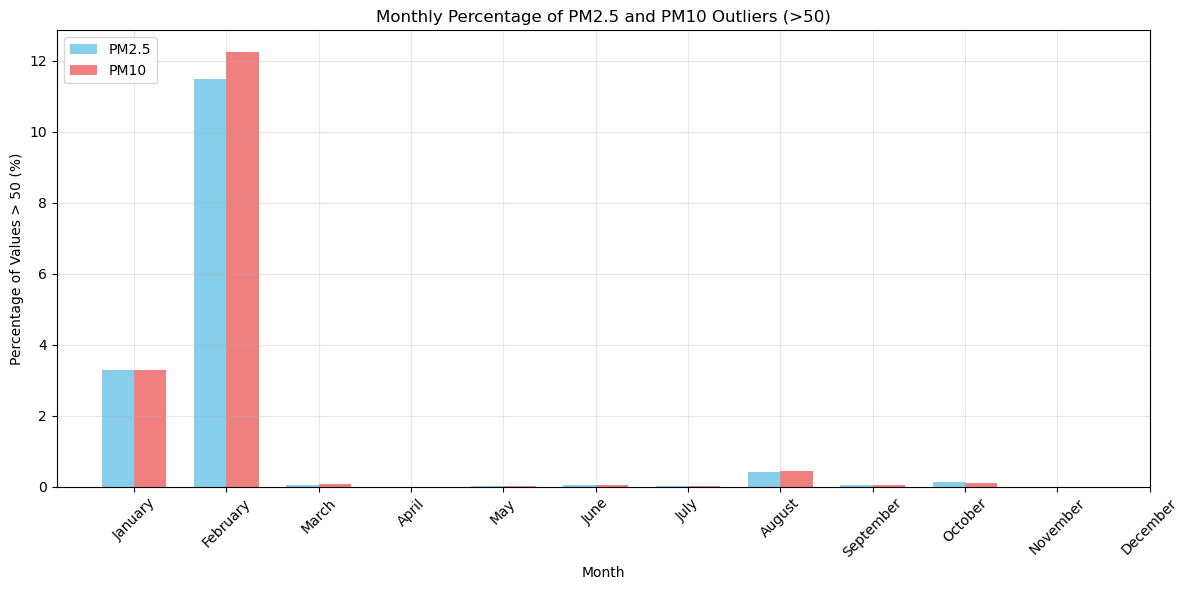

In [22]:
# Calculate percentages for each month
monthly_stats = []
for month in month_order:
    total_pm25 = df[df['Month'] == month]['pm25'].count()
    total_pm10 = df[df['Month'] == month]['pm10'].count()
    
    outliers_pm25 = df[(df['Month'] == month) & (df['pm25'] > 50)]['pm25'].count()
    outliers_pm10 = df[(df['Month'] == month) & (df['pm10'] > 50)]['pm10'].count()
    
    percentage_pm25 = (outliers_pm25 / total_pm25) * 100
    percentage_pm10 = (outliers_pm10 / total_pm10) * 100
    
    monthly_stats.append([month, percentage_pm25, percentage_pm10])

# Convert to DataFrame
monthly_df = pd.DataFrame(monthly_stats, columns=['Month', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(12, 6))
x = range(len(monthly_df['Month']))
width = 0.35

plt.bar([i - width/2 for i in x], monthly_df['PM2.5'], width, label='PM2.5', color='skyblue')
plt.bar([i + width/2 for i in x], monthly_df['PM10'], width, label='PM10', color='lightcoral')

plt.xlabel('Month')
plt.ylabel('Percentage of Values > 50 (%)')
plt.title('Monthly Percentage of PM2.5 and PM10 Outliers (>50)')
plt.xticks(x, monthly_df['Month'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\1204083879.py:10: RuntimeWarning: invalid value encountered in scalar divide
  percentage_pm25 = (outliers_pm25 / total_pm25) * 100
C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\1204083879.py:11: RuntimeWarning: invalid value encountered in scalar divide
  percentage_pm10 = (outliers_pm10 / total_pm10) * 100


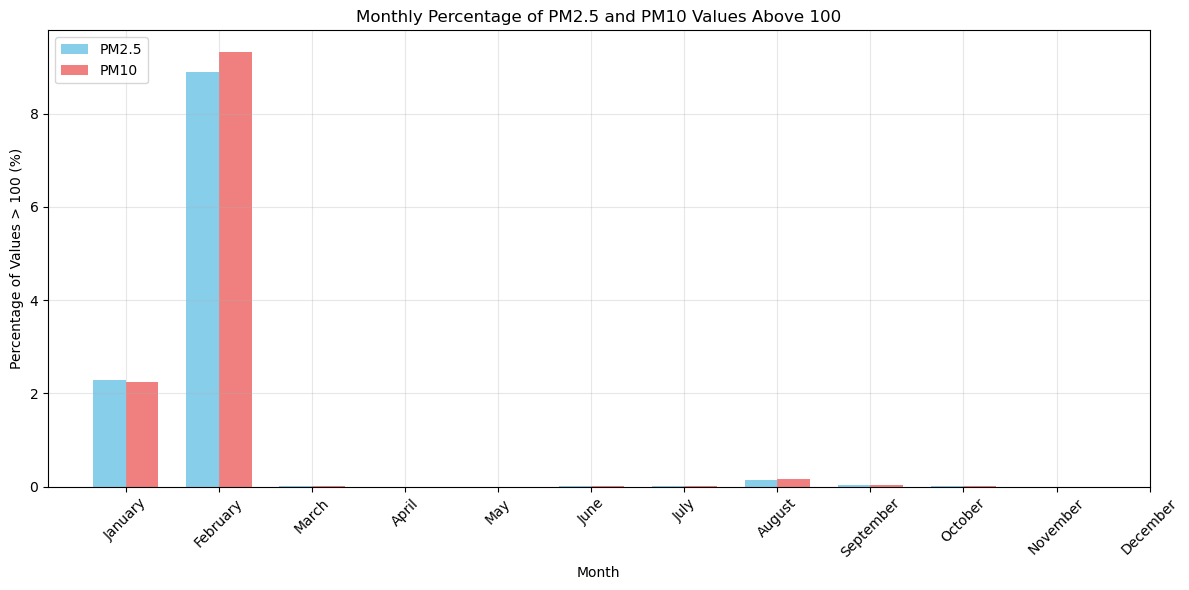

In [23]:
# Calculate percentages for each month
monthly_stats = []
for month in month_order:
    total_pm25 = df[df['Month'] == month]['pm25'].count()
    total_pm10 = df[df['Month'] == month]['pm10'].count()
    
    outliers_pm25 = df[(df['Month'] == month) & (df['pm25'] > 100)]['pm25'].count()
    outliers_pm10 = df[(df['Month'] == month) & (df['pm10'] > 100)]['pm10'].count()
    
    percentage_pm25 = (outliers_pm25 / total_pm25) * 100
    percentage_pm10 = (outliers_pm10 / total_pm10) * 100
    
    monthly_stats.append([month, percentage_pm25, percentage_pm10])

# Convert to DataFrame
monthly_df = pd.DataFrame(monthly_stats, columns=['Month', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(12, 6))
x = range(len(monthly_df['Month']))
width = 0.35

plt.bar([i - width/2 for i in x], monthly_df['PM2.5'], width, label='PM2.5', color='skyblue')
plt.bar([i + width/2 for i in x], monthly_df['PM10'], width, label='PM10', color='lightcoral')

plt.xlabel('Month')
plt.ylabel('Percentage of Values > 100 (%)')
plt.title('Monthly Percentage of PM2.5 and PM10 Values Above 100')
plt.xticks(x, monthly_df['Month'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

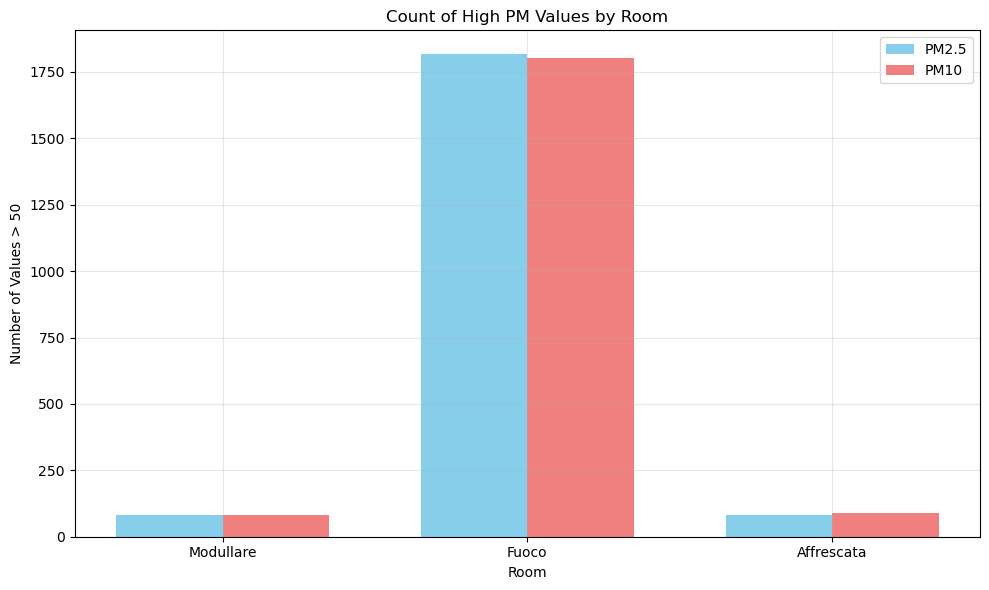

In [24]:
# Count values > 50 by room for both PM2.5 and PM10
#Purpose: counting the riskier values and... the outliers.
room_stats = []
for room in df['Room'].unique():
    # Count for PM2.5
    pm25_high = df[(df['Room'] == room) & (df['pm25'] > 50)].shape[0]
    
    # Count for PM10
    pm10_high = df[(df['Room'] == room) & (df['pm10'] > 50)].shape[0]
    
    room_stats.append([room, pm25_high, pm10_high])

# Convert to DataFrame
room_df = pd.DataFrame(room_stats, columns=['Room', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(10, 6))
x = range(len(room_df['Room']))
width = 0.35

plt.bar([i - width/2 for i in x], room_df['PM2.5'], width, label='PM2.5', color='skyblue')
plt.bar([i + width/2 for i in x], room_df['PM10'], width, label='PM10', color='lightcoral')

plt.xlabel('Room')
plt.ylabel('Number of Values > 50')
plt.title('Count of High PM Values by Room')
plt.xticks(x, room_df['Room'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

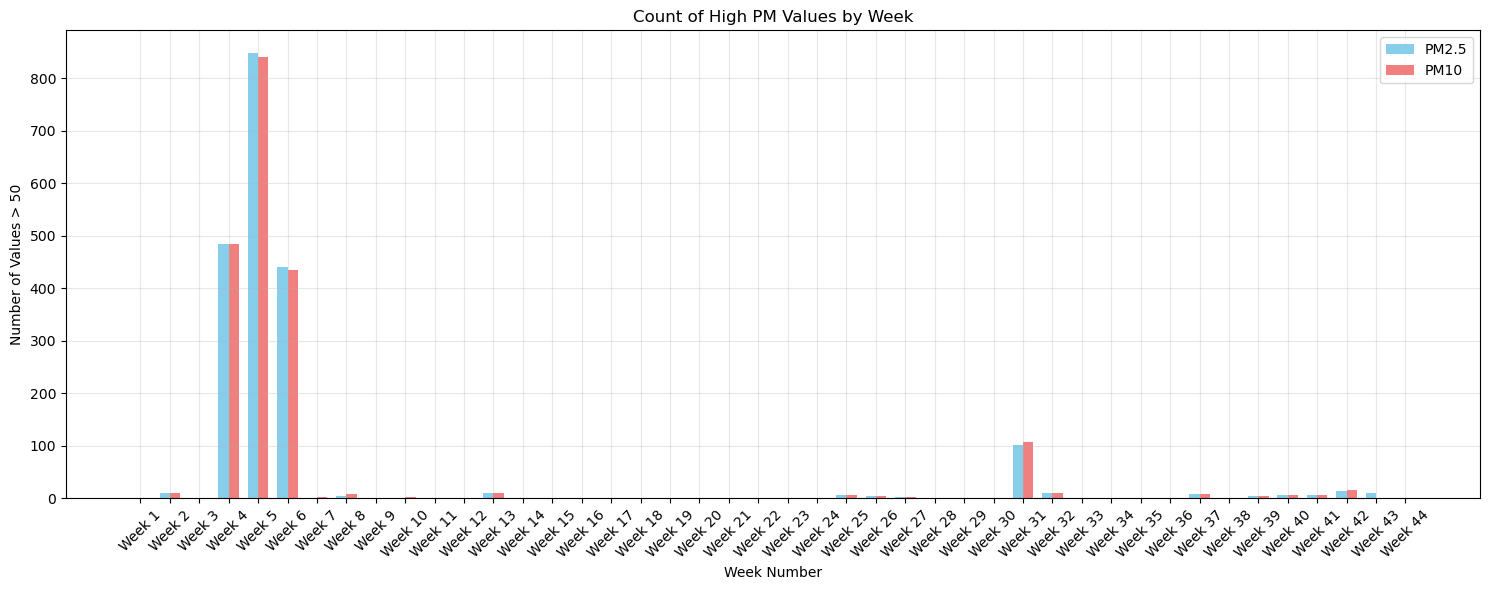

In [25]:
# Extract week number from timestamp
df['Week'] = pd.to_datetime(df['timestamp(Europe/Rome)']).dt.isocalendar().week

# Count values > 50 by week for both PM2.5 and PM10
week_stats = []
for week in sorted(df['Week'].unique()):
    # Count for PM2.5
    pm25_high = df[(df['Week'] == week) & (df['pm25'] > 50)].shape[0]
    
    # Count for PM10
    pm10_high = df[(df['Week'] == week) & (df['pm10'] > 50)].shape[0]
    
    week_stats.append([f'Week {week}', pm25_high, pm10_high])

# Convert to DataFrame
week_df = pd.DataFrame(week_stats, columns=['Week', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(15, 6))  # Made it wider to accommodate all weeks
x = range(len(week_df['Week']))
width = 0.35

plt.bar([i - width/2 for i in x], week_df['PM2.5'], width, label='PM2.5', color='skyblue')
plt.bar([i + width/2 for i in x], week_df['PM10'], width, label='PM10', color='lightcoral')

plt.xlabel('Week Number')
plt.ylabel('Number of Values > 50')
plt.title('Count of High PM Values by Week')
plt.xticks(x, week_df['Week'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

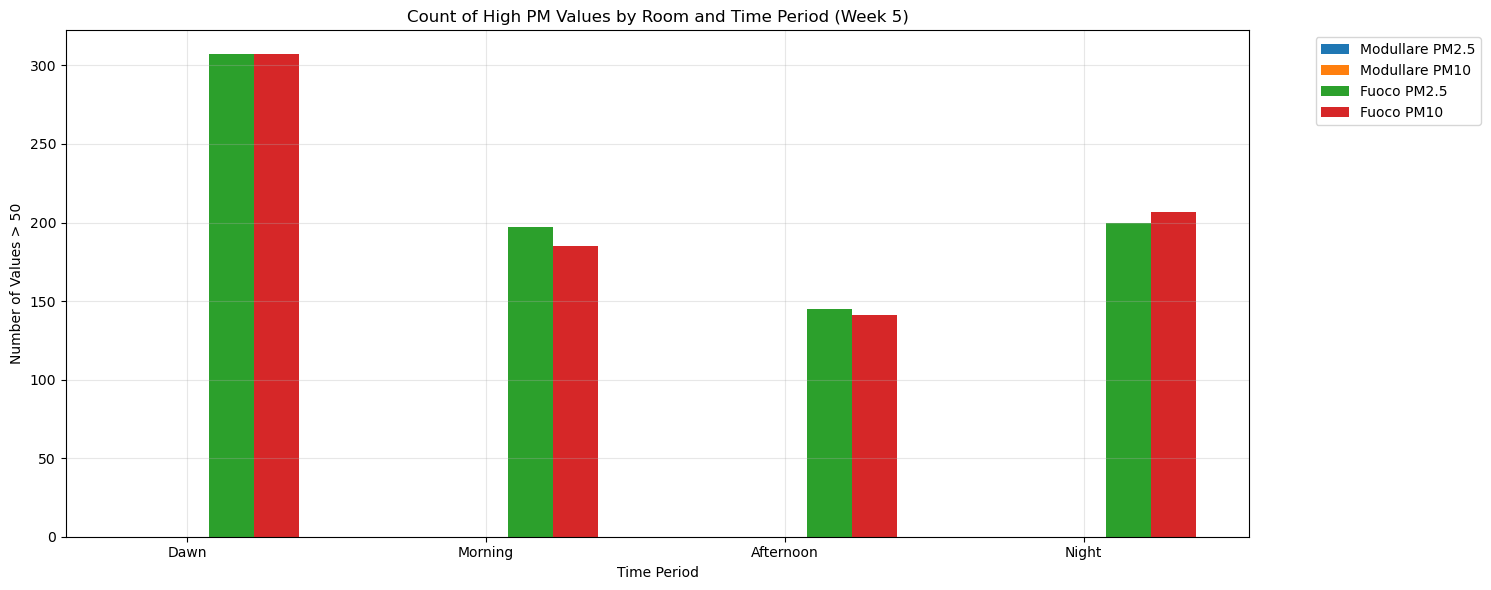


Detailed counts for Week 5
     Room TimePeriod  PM2.5  PM10
Modullare       Dawn      0     0
Modullare    Morning      0     0
Modullare  Afternoon      0     0
Modullare      Night      0     0
    Fuoco       Dawn    307   307
    Fuoco    Morning    197   185
    Fuoco  Afternoon    145   141
    Fuoco      Night    200   207


In [26]:
# First, let's extract hour from timestamp and create time periods
df['Hour'] = pd.to_datetime(df['timestamp(Europe/Rome)']).dt.hour
df['TimePeriod'] = pd.cut(df['Hour'], 
                         bins=[0, 6, 12, 18, 24], 
                         labels=['Dawn', 'Morning', 'Afternoon', 'Night'],
                         include_lowest=True)

# Find the week with highest count of outliers
week_counts = df[df['pm25'] > 50].groupby('Week').size()
highest_week = week_counts.idxmax()

# Filter data for the highest week
high_week_data = df[df['Week'] == highest_week]

# Count outliers by room and time period
time_room_stats = []
for room in high_week_data['Room'].unique():
    for period in ['Dawn', 'Morning', 'Afternoon', 'Night']:
        room_period_data = high_week_data[
            (high_week_data['Room'] == room) & 
            (high_week_data['TimePeriod'] == period)
        ]
        
        pm25_high = room_period_data[room_period_data['pm25'] > 50].shape[0]
        pm10_high = room_period_data[room_period_data['pm10'] > 50].shape[0]
        
        time_room_stats.append([room, period, pm25_high, pm10_high])

# Convert to DataFrame
stats_df = pd.DataFrame(time_room_stats, 
                       columns=['Room', 'TimePeriod', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(15, 6))
x = np.arange(len(stats_df['TimePeriod'].unique()))
width = 0.15
multiplier = 0

# Plot bars for each room
for room in stats_df['Room'].unique():
    room_data = stats_df[stats_df['Room'] == room]
    offset = width * multiplier
    plt.bar(x + offset, room_data['PM2.5'], width, label=f'{room} PM2.5')
    plt.bar(x + offset + width, room_data['PM10'], width, label=f'{room} PM10')
    multiplier += 2

plt.xlabel('Time Period')
plt.ylabel('Number of Values > 50')
plt.title(f'Count of High PM Values by Room and Time Period (Week {highest_week})')
plt.xticks(x + width, ['Dawn', 'Morning', 'Afternoon', 'Night'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the actual counts
print("\nDetailed counts for Week", highest_week)
print(stats_df.to_string(index=False))

In [27]:
# Dates for weeks 4 and 6: this is where the highest peak of outliers is.
week_4_start = df[df['Week'] == 4]['timestamp(Europe/Rome)'].min()
week_6_end = df[df['Week'] == 6]['timestamp(Europe/Rome)'].max()

print(f"Week 4 starts: {week_4_start}")
print(f"Week 6 ends: {week_6_end}")

Week 4 starts: 2024-01-22 00:00:00
Week 6 ends: 2024-02-11 23:55:00


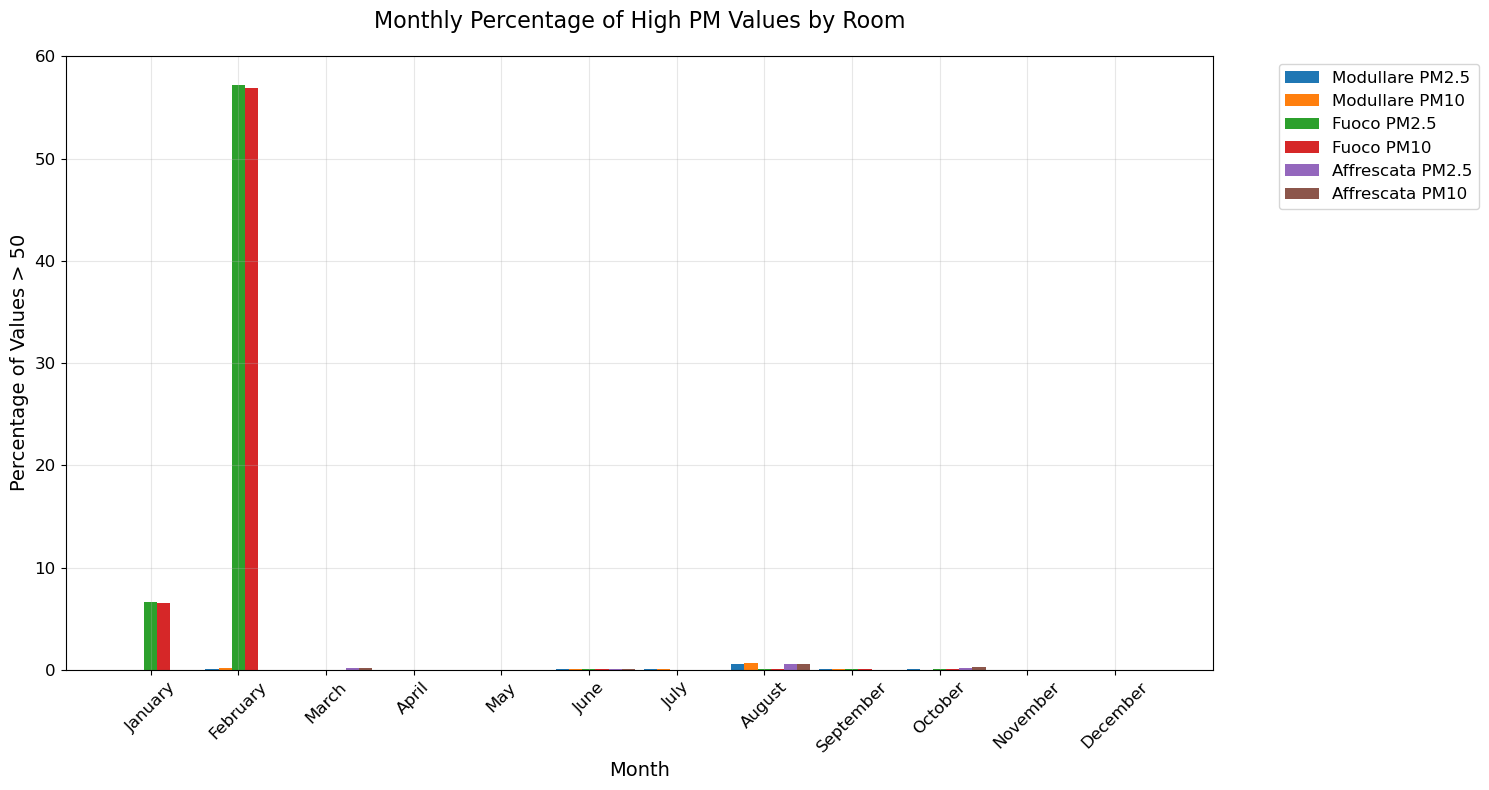

In [28]:
# Calculate percentages for each month and room
monthly_room_stats = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Total readings for this room and month
        total_readings = len(room_data)
        
        if total_readings > 0:  # Avoid division by zero
            # Calculate percentages for PM2.5 and PM10
            pm25_high = room_data[room_data['pm25'] > 50].shape[0]
            pm10_high = room_data[room_data['pm10'] > 50].shape[0]
            
            pm25_percent = (pm25_high / total_readings) * 100
            pm10_percent = (pm10_high / total_readings) * 100
        else:
            pm25_percent = 0
            pm10_percent = 0
            
        monthly_room_stats.append([month, room, pm25_percent, pm10_percent])

# Convert to DataFrame
monthly_room_df = pd.DataFrame(monthly_room_stats, 
                             columns=['Month', 'Room', 'PM2.5', 'PM10'])

# Create the plot
plt.figure(figsize=(15, 8))
x = np.arange(len(month_order))
width = 0.15
multiplier = 0

# Plot bars for each room
for room in df['Room'].unique():
    room_data = monthly_room_df[monthly_room_df['Room'] == room]
    offset = width * multiplier
    plt.bar(x + offset, room_data['PM2.5'], width, label=f'{room} PM2.5')
    plt.bar(x + offset + width, room_data['PM10'], width, label=f'{room} PM10')
    multiplier += 2

# Customize the plot
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage of Values > 50', fontsize=14)
plt.title('Monthly Percentage of High PM Values by Room', fontsize=16, pad=20)
plt.xticks(x + width*2, month_order, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
# Calculate counts for each month and room
monthly_room_counts = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Count values > 50 for PM2.5 and PM10
        pm25_high = room_data[room_data['pm25'] > 50].shape[0]
        pm10_high = room_data[room_data['pm10'] > 50].shape[0]
        
        monthly_room_counts.append([month, room, pm25_high, pm10_high])

# Convert to DataFrame and create pivot tables
counts_df = pd.DataFrame(monthly_room_counts, columns=['Month', 'Room', 'PM2.5', 'PM10'])

pm25_table = counts_df.pivot(index='Month', columns='Room', values='PM2.5')
pm10_table = counts_df.pivot(index='Month', columns='Room', values='PM10')

# Reorder months
pm25_table = pm25_table.reindex(month_order)
pm10_table = pm10_table.reindex(month_order)

print("PM2.5 Count of Values > 50 by Room and Month:")
print(pm25_table)
print("\nPM10 Count of Values > 50 by Room and Month:")
print(pm10_table)

# Optionally, to save these to Excel:
# pm25_table.to_excel('pm25_counts.xlsx')
# pm10_table.to_excel('pm10_counts.xlsx')

PM2.5 Count of Values > 50 by Room and Month:
Room       Affrescata  Fuoco  Modullare
Month                                  
January             0    589          0
February            0   1197          4
March              10      0          1
April               0      0          0
May                 0      1          2
June                4      5          3
July                0      0          4
August             49     10         53
September           0      8          5
October            20      6         11
November            0      0          0
December            0      0          0

PM10 Count of Values > 50 by Room and Month:
Room       Affrescata  Fuoco  Modullare
Month                                  
January             0    581          0
February            0   1190         11
March              11      0          1
April               0      0          0
May                 0      1          2
June                5      5          3
July                0      0

In [30]:
# Calculate percentages for each month and room
monthly_room_percentages = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Total readings for this room and month
        total_readings = len(room_data)
        
        if total_readings > 0:  # Avoid division by zero
            # Calculate percentages
            pm25_high = room_data[room_data['pm25'] > 50].shape[0]
            pm10_high = room_data[room_data['pm10'] > 50].shape[0]
            
            pm25_percent = (pm25_high / total_readings) * 100
            pm10_percent = (pm10_high / total_readings) * 100
        else:
            pm25_percent = 0
            pm10_percent = 0
            
        monthly_room_percentages.append([month, room, pm25_percent, pm10_percent])

# Convert to DataFrame and create pivot tables
percentages_df = pd.DataFrame(monthly_room_percentages, columns=['Month', 'Room', 'PM2.5', 'PM10'])

pm25_table = percentages_df.pivot(index='Month', columns='Room', values='PM2.5')
pm10_table = percentages_df.pivot(index='Month', columns='Room', values='PM10')

# Reorder months and round to 2 decimal places
pm25_table = pm25_table.reindex(month_order).round(2)
pm10_table = pm10_table.reindex(month_order).round(2)

print("PM2.5 Percentage of Values > 50 by Room and Month:")
print(pm25_table)
print("\nPM10 Percentage of Values > 50 by Room and Month:")
print(pm10_table)

# Optionally, to save these to Excel:
# pm25_table.to_excel('pm25_percentages.xlsx')
# pm10_table.to_excel('pm10_percentages.xlsx')

PM2.5 Percentage of Values > 50 by Room and Month:
Room       Affrescata  Fuoco  Modullare
Month                                  
January          0.00   6.60       0.00
February         0.00  57.19       0.05
March            0.17   0.00       0.01
April            0.00   0.00       0.00
May              0.00   0.01       0.02
June             0.05   0.06       0.03
July             0.00   0.00       0.04
August           0.55   0.11       0.59
September        0.00   0.09       0.06
October          0.22   0.07       0.12
November         0.00   0.00       0.00
December         0.00   0.00       0.00

PM10 Percentage of Values > 50 by Room and Month:
Room       Affrescata  Fuoco  Modullare
Month                                  
January          0.00   6.51       0.00
February         0.00  56.86       0.13
March            0.19   0.00       0.01
April            0.00   0.00       0.00
May              0.00   0.01       0.02
June             0.06   0.06       0.03
July             0

In [31]:
# Calculate means of outliers for each month and room
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calculate means for values > 50
        pm25_mean = room_data[room_data['pm25'] > 50]['pm25'].mean()
        pm10_mean = room_data[room_data['pm10'] > 50]['pm10'].mean()
        
        monthly_room_means.append([month, room, pm25_mean, pm10_mean])

# Convert to DataFrame and create pivot tables
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM2.5', 'PM10'])

pm25_table = means_df.pivot(index='Month', columns='Room', values='PM2.5')
pm10_table = means_df.pivot(index='Month', columns='Room', values='PM10')

# Reorder months and round to 2 decimal places
pm25_table = pm25_table.reindex(month_order).round(2)
pm10_table = pm10_table.reindex(month_order).round(2)

print("PM2.5 Mean Values of Outliers (>50) by Room and Month:")
print(pm25_table)
print("\nPM10 Mean Values of Outliers (>50) by Room and Month:")
print(pm10_table)

PM2.5 Mean Values of Outliers (>50) by Room and Month:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN  383.85        NaN
February          NaN  384.78      52.55
March           76.92     NaN     134.10
April             NaN     NaN        NaN
May               NaN   68.40      73.05
June            89.00   91.50      73.33
July              NaN     NaN     196.62
August          83.45  164.91      95.22
September         NaN  104.16     181.84
October         67.61  113.77     107.67
November          NaN     NaN        NaN
December          NaN     NaN        NaN

PM10 Mean Values of Outliers (>50) by Room and Month:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN  375.29        NaN
February          NaN  385.29      52.51
March           76.57     NaN     136.80
April             NaN     NaN        NaN
May               NaN   70.40      75.00
June            83.26   93.80

In [32]:
# First identify which month-room combinations had outliers
has_outliers_pm25 = df[df['pm25'] > 50].groupby(['Month', 'Room']).size().reset_index()
has_outliers_pm10 = df[df['pm10'] > 50].groupby(['Month', 'Room']).size().reset_index()

# Calculate means for each month and room
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        # Check if this month-room had any outliers
        had_pm25_outliers = ((has_outliers_pm25['Month'] == month) & 
                            (has_outliers_pm25['Room'] == room)).any()
        had_pm10_outliers = ((has_outliers_pm10['Month'] == month) & 
                            (has_outliers_pm10['Room'] == room)).any()
        
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calculate means only if there were outliers
        pm25_mean = room_data['pm25'].mean() if had_pm25_outliers else None
        pm10_mean = room_data['pm10'].mean() if had_pm10_outliers else None
        
        monthly_room_means.append([month, room, pm25_mean, pm10_mean])

# Convert to DataFrame and create pivot tables
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM2.5', 'PM10'])

pm25_table = means_df.pivot(index='Month', columns='Room', values='PM2.5')
pm10_table = means_df.pivot(index='Month', columns='Room', values='PM10')

# Reorder months and round to 2 decimal places
pm25_table = pm25_table.reindex(month_order).round(2)
pm10_table = pm10_table.reindex(month_order).round(2)

print("PM2.5 Average Values for Months with Outliers:")
print(pm25_table)
print("\nPM10 Average Values for Months with Outliers:")
print(pm10_table)

PM2.5 Average Values for Months with Outliers:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.37        NaN
February          NaN  226.32       7.88
March            4.73     NaN       4.41
April             NaN     NaN        NaN
May               NaN    3.53       3.88
June             4.38    4.15       4.26
July              NaN     NaN       5.44
August           6.76    5.47       7.15
September         NaN    3.78       4.30
October          7.07    5.43       5.01
November          NaN     NaN        NaN
December          NaN     NaN        NaN

PM10 Average Values for Months with Outliers:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.75        NaN
February          NaN  235.02       9.12
March            5.74     NaN       5.39
April             NaN     NaN        NaN
May               NaN    4.47       4.82
June             5.37    5.13       5.24
July

In [33]:
# Calcular promedios para cada mes y habitación
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calcular promedios de todos los valores
        pm25_mean = room_data['pm25'].mean()
        pm10_mean = room_data['pm10'].mean()
        
        monthly_room_means.append([month, room, pm25_mean, pm10_mean])

# Convertir a DataFrame y crear tablas pivot
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM2.5', 'PM10'])

pm25_table = means_df.pivot(index='Month', columns='Room', values='PM2.5')
pm10_table = means_df.pivot(index='Month', columns='Room', values='PM10')

# Reordenar meses y redondear a 2 decimales
pm25_table = pm25_table.reindex(month_order).round(2)
pm10_table = pm10_table.reindex(month_order).round(2)

print("Valores Promedio de PM2.5 por Mes y Habitación:")
print(pm25_table)
print("\nValores Promedio de PM10 por Mes y Habitación:")
print(pm10_table)

Valores Promedio de PM2.5 por Mes y Habitación:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.37       8.08
February          NaN  226.32       7.88
March            4.73    5.23       4.41
April            3.34    3.35       3.30
May              3.92    3.53       3.88
June             4.38    4.15       4.26
July             5.02    4.55       5.44
August           6.76    5.47       7.15
September        4.76    3.78       4.30
October          7.07    5.43       5.01
November          NaN     NaN        NaN
December          NaN     NaN        NaN

Valores Promedio de PM10 por Mes y Habitación:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.75       9.08
February          NaN  235.02       9.12
March            5.74    6.21       5.39
April            4.31    4.28       4.30
May              4.89    4.47       4.82
June             5.37    5.13       5.24
Ju

In [34]:
#There is no data in January for the Affrescata
#  Verificar datos para Affrescata en enero y febrero
for month in ['January', 'February']:
    data = df[(df['Month'] == month) & (df['Room'] == 'Affrescata')]
    count = len(data)
    print(f"Número de mediciones en {month} para Affrescata: {count}")

Número de mediciones en January para Affrescata: 0
Número de mediciones en February para Affrescata: 0


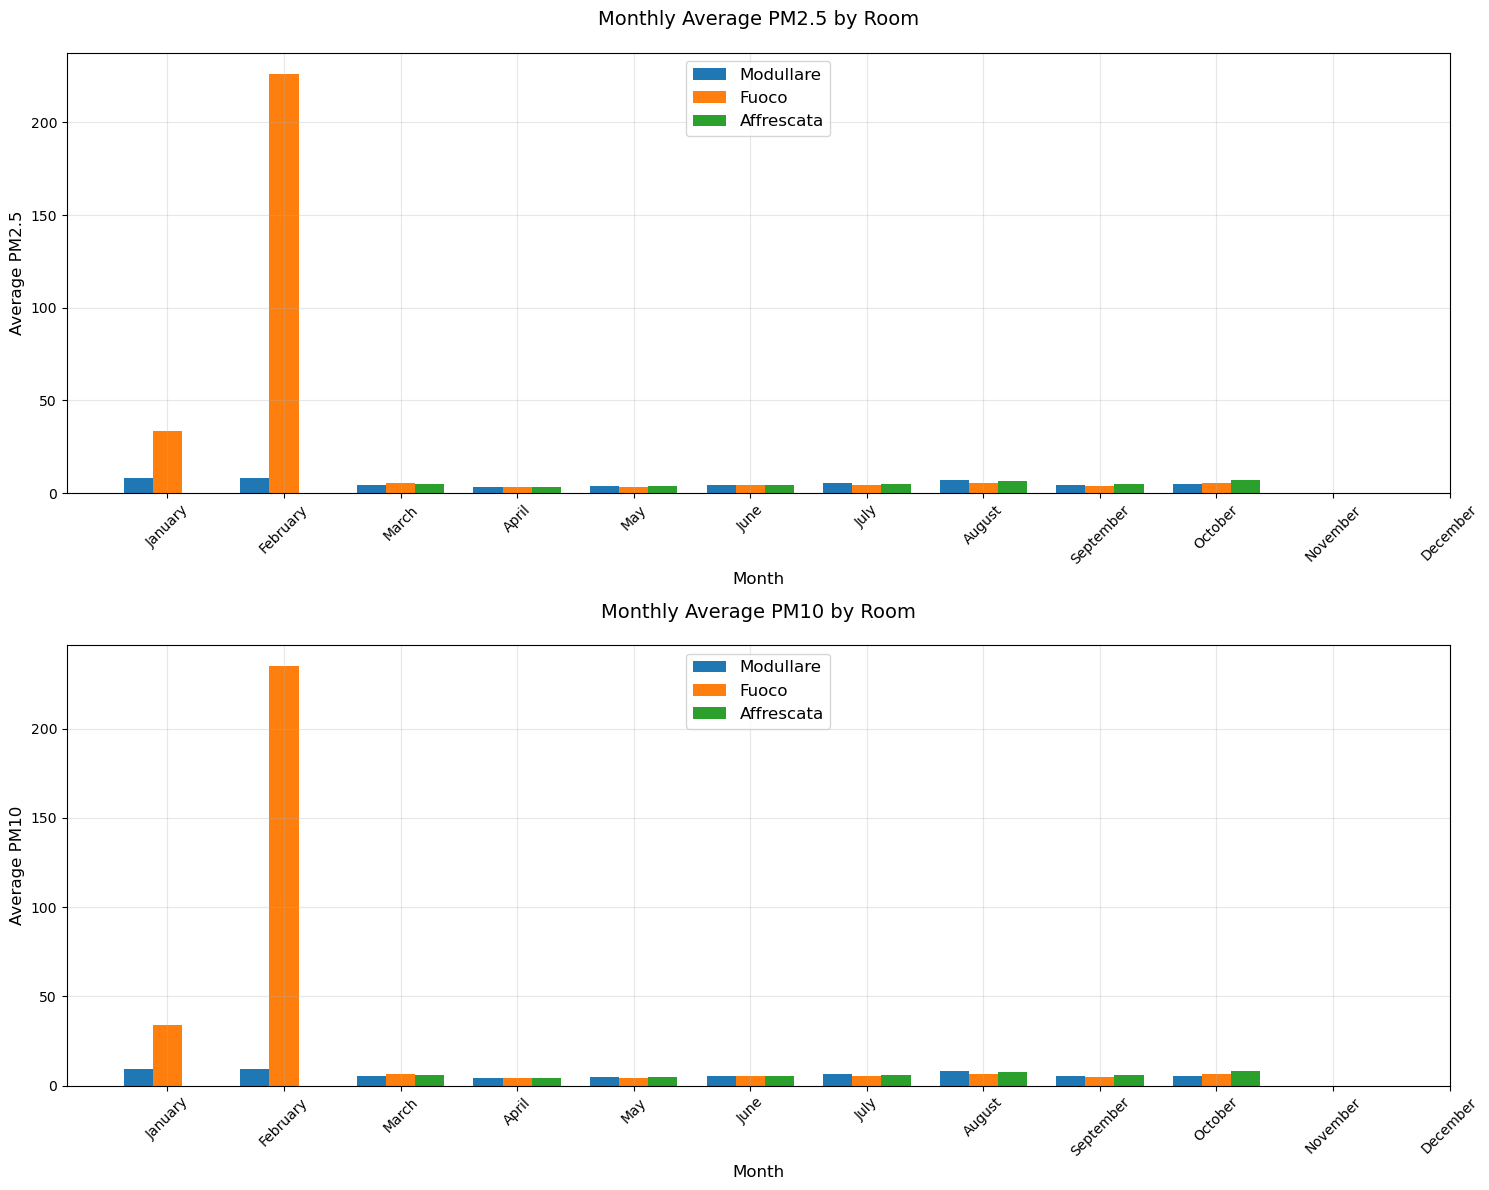

In [35]:
# Calculate means for each month and room
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calculate means
        pm25_mean = room_data['pm25'].mean()
        pm10_mean = room_data['pm10'].mean()
        
        monthly_room_means.append([month, room, pm25_mean, pm10_mean])

# Convert to DataFrame
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM2.5', 'PM10'])

# Create two separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot for PM2.5
x = np.arange(len(month_order))
width = 0.25
multiplier = 0

for room in df['Room'].unique():
    room_data = means_df[means_df['Room'] == room]
    offset = width * multiplier
    ax1.bar(x + offset, room_data['PM2.5'], width, label=room)
    multiplier += 1

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average PM2.5', fontsize=12)
ax1.set_title('Monthly Average PM2.5 by Room', fontsize=14, pad=20)
ax1.set_xticks(x + width)
ax1.set_xticklabels(month_order, rotation=45, fontsize=10)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot for PM10
multiplier = 0
for room in df['Room'].unique():
    room_data = means_df[means_df['Room'] == room]
    offset = width * multiplier
    ax2.bar(x + offset, room_data['PM10'], width, label=room)
    multiplier += 1

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average PM10', fontsize=12)
ax2.set_title('Monthly Average PM10 by Room', fontsize=14, pad=20)
ax2.set_xticks(x + width)
ax2.set_xticklabels(month_order, rotation=45, fontsize=10)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

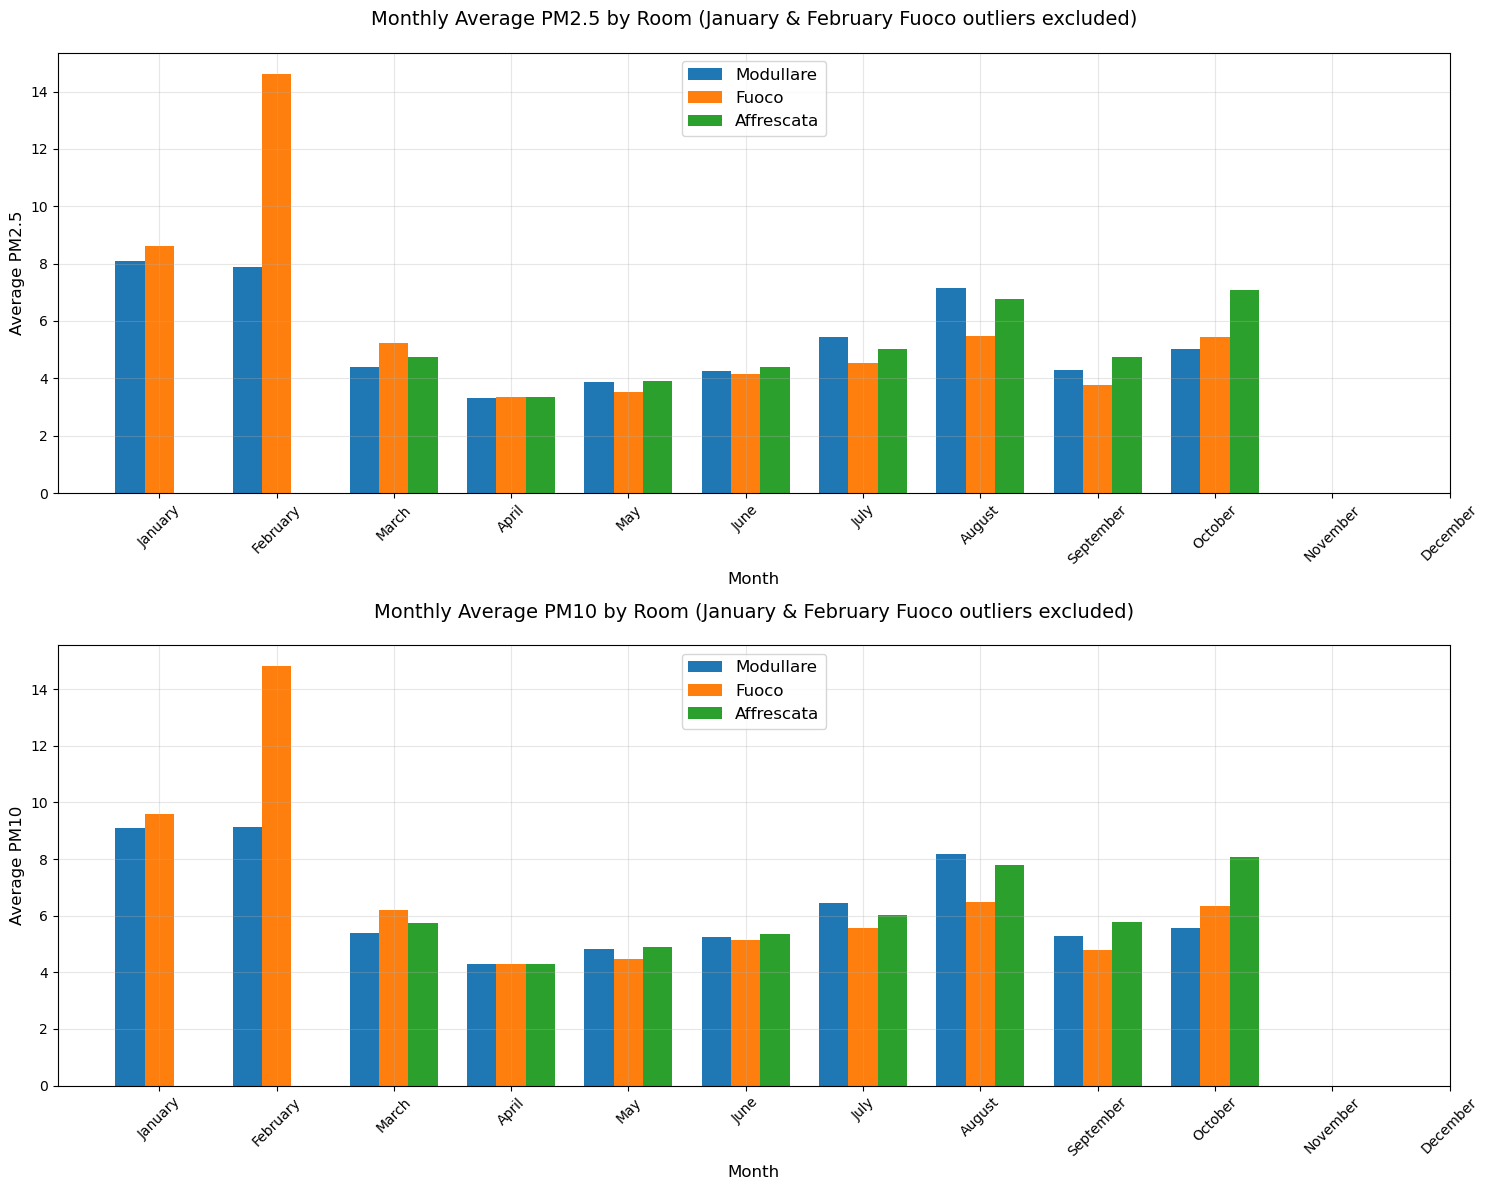

In [36]:
#Without the outliers of february and january of Fuoco, 
#the values are completely between a normal and healthy range.

# Create a temporary dataframe for this visualization
df_temp = df.copy()

# Replace values >50 with NaN for Fuoco in January and February
mask = (df_temp['Room'] == 'Fuoco') & (df_temp['Month'].isin(['January', 'February']))
df_temp.loc[mask & (df_temp['pm25'] > 50), 'pm25'] = np.nan
df_temp.loc[mask & (df_temp['pm10'] > 50), 'pm10'] = np.nan

# Calculate means for each month and room
monthly_room_means = []
for month in month_order:
    for room in df_temp['Room'].unique():
        room_data = df_temp[(df_temp['Month'] == month) & (df_temp['Room'] == room)]
        
        # Calculate means
        pm25_mean = room_data['pm25'].mean()
        pm10_mean = room_data['pm10'].mean()
        
        monthly_room_means.append([month, room, pm25_mean, pm10_mean])

# Convert to DataFrame
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM2.5', 'PM10'])

# Create two separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot for PM2.5
x = np.arange(len(month_order))
width = 0.25
multiplier = 0

for room in df_temp['Room'].unique():
    room_data = means_df[means_df['Room'] == room]
    offset = width * multiplier
    ax1.bar(x + offset, room_data['PM2.5'], width, label=room)
    multiplier += 1

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average PM2.5', fontsize=12)
ax1.set_title('Monthly Average PM2.5 by Room (January & February Fuoco outliers excluded)', fontsize=14, pad=20)
ax1.set_xticks(x + width)
ax1.set_xticklabels(month_order, rotation=45, fontsize=10)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot for PM10
multiplier = 0
for room in df_temp['Room'].unique():
    room_data = means_df[means_df['Room'] == room]
    offset = width * multiplier
    ax2.bar(x + offset, room_data['PM10'], width, label=room)
    multiplier += 1

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average PM10', fontsize=12)
ax2.set_title('Monthly Average PM10 by Room (January & February Fuoco outliers excluded)', fontsize=14, pad=20)
ax2.set_xticks(x + width)
ax2.set_xticklabels(month_order, rotation=45, fontsize=10)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# Filter rows where either PM2.5 or PM10 > 50
high_pm_data = df[(df['pm25'] > 50) | (df['pm10'] > 50)]

# Select relevant columns and sort by timestamp
result_table = high_pm_data[[
    'timestamp(Europe/Rome)', 
    'Room',
    'pm25',
    'pm10',
    'score',
    'Temperature in C',
    'noise'
]].sort_values('timestamp(Europe/Rome)')

# Round numeric columns to 2 decimal places
numeric_columns = ['pm25', 'pm10', 'score', 'Temperature in C', 'noise']
result_table[numeric_columns] = result_table[numeric_columns].round(2)

# Display the table
print("Measurements when PM2.5 or PM10 > 50:")
print(result_table.to_string(index=False))

# Optionally, save to Excel for better viewing
# result_table.to_excel('high_pm_measurements.xlsx', index=False)

Measurements when PM2.5 or PM10 > 50:
timestamp(Europe/Rome)       Room   pm25   pm10  score  Temperature in C  noise
   2024-01-04 16:35:00      Fuoco   53.4   55.0   82.6             21.28   41.3
   2024-01-11 16:15:00      Fuoco  200.4  204.0   34.1             23.11   41.8
   2024-01-11 16:20:00      Fuoco  911.1  923.3    0.0             22.28   41.9
   2024-01-11 16:25:00      Fuoco  936.4  948.8    0.0             22.83   41.8
   2024-01-11 16:30:00      Fuoco  679.5  688.7    6.0             23.17   42.0
   2024-01-11 16:35:00      Fuoco   58.5   60.4   35.3             23.33   41.8
   2024-01-11 17:15:00      Fuoco  384.4  390.2   18.9             20.83   41.6
   2024-01-11 17:20:00      Fuoco  612.1  620.6    0.0             19.83   41.6
   2024-01-11 17:25:00      Fuoco  542.2  550.0    0.0             20.17   41.5
   2024-01-11 17:30:00      Fuoco   52.5   54.4   43.1             21.44   41.4
   2024-01-11 17:45:00      Fuoco   82.2   84.3   20.6             20.17   41.4
  

In [38]:
# Filter rows where either PM2.5 or PM10 > 50
high_pm_data = df[(df['pm25'] > 50) | (df['pm10'] > 50)]

# Select relevant columns
result_table = high_pm_data[[
    'timestamp(Europe/Rome)', 
    'Room',
    'pm25',
    'pm10',
    'score',
    'Temperature in C',
    'noise',
    'co2'
]].sort_values('score')

# Round numeric columns to 2 decimal places
numeric_columns = ['pm25', 'pm10', 'score', 'Temperature in C', 'noise', 'co2']
result_table[numeric_columns] = result_table[numeric_columns].round(2)

# Get top and bottom 10
bottom_10 = result_table.head(10)
top_10 = result_table.tail(10)

print("Bottom 10 Scores when PM2.5 or PM10 > 50:")
print(bottom_10.to_string(index=False))
print("\nTop 10 Scores when PM2.5 or PM10 > 50:")
print(top_10.to_string(index=False))

# Optionally, save to Excel
# pd.concat([bottom_10, top_10]).to_excel('extreme_scores_high_pm.xlsx', index=False)

Bottom 10 Scores when PM2.5 or PM10 > 50:
timestamp(Europe/Rome)  Room   pm25   pm10  score  Temperature in C  noise    co2
   2024-02-05 12:55:00 Fuoco 1000.0 1013.0    0.0             23.78   42.0 2537.2
   2024-02-05 13:05:00 Fuoco 1000.0 1013.0    0.0             23.67   42.0 2461.2
   2024-02-07 17:25:00 Fuoco 1000.0 1013.0    0.0             24.33   41.8 2103.2
   2024-02-06 11:25:00 Fuoco 1000.0 1013.0    0.0             22.78   42.5 2030.2
   2024-02-07 17:30:00 Fuoco  997.8 1010.8    0.0             24.33   41.7 2112.6
   2024-02-05 13:00:00 Fuoco 1000.0 1013.0    0.0             23.67   42.0 2524.6
   2024-02-05 12:50:00 Fuoco 1000.0 1013.0    0.0             23.83   42.1 2497.6
   2024-02-05 12:45:00 Fuoco 1000.0 1013.0    0.0             23.83   41.9 2429.9
   2024-02-05 12:40:00 Fuoco 1000.0 1013.0    0.0             23.78   41.9 2349.0
   2024-02-05 12:35:00 Fuoco 1000.0 1013.0    0.0             23.72   41.9 2277.9

Top 10 Scores when PM2.5 or PM10 > 50:
timestamp(Europe

In [39]:
# Ensure timestamp is datetime
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Create a date column without time
df['date'] = df['timestamp(Europe/Rome)'].dt.date

# Calculate daily averages for all relevant columns, grouped by room and date
daily_df = df.groupby(['date', 'Room']).agg({
    'pm10': 'mean',
    'pm25': 'mean',
    'score': 'mean',
    'Temperature in C': 'mean',
    'noise': 'mean',
    'co2': 'mean'
}).reset_index()

# Create a column to count days with PM10 and PM2.5 > 50
daily_df['pm10_exceeds_50'] = daily_df['pm10'] > 50
daily_df['pm25_exceeds_50'] = daily_df['pm25'] > 50

# Count the number of days with PM10 and PM2.5 > 50 for each room
days_exceeding = daily_df.groupby('Room').agg({
    'pm10_exceeds_50': 'sum',
    'pm25_exceeds_50': 'sum'
}).reset_index()

# Merge the daily averages with the counts of exceeding days
result_df = pd.merge(daily_df, days_exceeding, on='Room', how='left')

# Display the result
print("Daily Averages and Days Exceeding PM10 and PM2.5 > 50:")
print(result_df.to_string(index=False))

# Optionally, save to Excel
# result_df.to_excel('daily_averages_and_exceeding_days.xlsx', index=False)

Daily Averages and Days Exceeding PM10 and PM2.5 > 50:
      date       Room       pm10       pm25      score  Temperature in C     noise         co2  pm10_exceeds_50_x  pm25_exceeds_50_x  pm10_exceeds_50_y  pm25_exceeds_50_y
2024-01-01      Fuoco   5.124653   4.124306  98.854861         21.420525 41.300000  419.879167              False              False                 12                 12
2024-01-01  Modullare   5.528819   4.528819  98.814583         23.468557 52.819792  424.199306              False              False                  0                  0
2024-01-02      Fuoco   7.642014   6.640972  89.367708         19.478974 41.300000  428.093056              False              False                 12                 12
2024-01-02  Modullare   5.735764   4.735764  93.966667         23.511767 53.230556  428.304514              False              False                  0                  0
2024-01-03      Fuoco   6.546875   5.546875  92.217708         20.646412 41.301042  434.55

In [40]:
# Count the number of days with PM10 and PM2.5 > 50 for each room
days_exceeding = daily_df.groupby('Room').agg({
    'pm10_exceeds_50': 'sum',
    'pm25_exceeds_50': 'sum'
}).reset_index()

# Rename the columns for clarity
days_exceeding.columns = ['Room', 'Days PM10 > 50', 'Days PM2.5 > 50']

# Display the result
print("Number of Days with PM10 and PM2.5 Exceeding 50:")
print(days_exceeding.to_string(index=False))

# Optionally, save to Excel
# days_exceeding.to_excel('days_exceeding_pm.xlsx', index=False)

Number of Days with PM10 and PM2.5 Exceeding 50:
      Room  Days PM10 > 50  Days PM2.5 > 50
Affrescata               0                0
     Fuoco              12               12
 Modullare               0                0


In [41]:
# Filter for days where PM10 or PM2.5 exceed 50
exceeding_days = daily_df[(daily_df['pm10'] > 50) | (daily_df['pm25'] > 50)]

# Select relevant columns for display
result_days = exceeding_days[['date', 'Room', 'pm10', 'pm25', 'score', 'Temperature in C', 'noise', 'co2']]

# Round numeric columns to 2 decimal places
numeric_columns = ['pm10', 'pm25', 'score', 'Temperature in C', 'noise', 'co2']
result_days[numeric_columns] = result_days[numeric_columns].round(2)

# Display the result
print("Days with PM10 or PM2.5 Exceeding 50:")
print(result_days.to_string(index=False))

# Optionally, save to Excel
# result_days.to_excel('exceeding_days_pm.xlsx', index=False)

Days with PM10 or PM2.5 Exceeding 50:
      date  Room   pm10   pm25  score  Temperature in C  noise     co2
2024-01-23 Fuoco 216.70 219.51  54.25             22.20  41.95  850.34
2024-01-24 Fuoco 147.17 144.35  63.13             23.26  41.38 1105.82
2024-01-25 Fuoco 249.40 245.35  54.97             23.54  41.41 1098.29
2024-01-31 Fuoco 187.84 175.79  66.34             22.14  42.02  622.16
2024-02-01 Fuoco 141.44 120.64  60.04             22.89  42.22  925.97
2024-02-02 Fuoco 109.05 106.55  60.85             23.47  41.46  881.05
2024-02-03 Fuoco 227.46 223.65  57.89             24.00  41.50  727.37
2024-02-04 Fuoco 103.04 100.55  70.51             21.70  41.30  411.81
2024-02-05 Fuoco 326.93 331.00  64.24             21.38  41.54  751.74
2024-02-06 Fuoco 521.38 509.52  36.40             21.37  41.61 1342.05
2024-02-07 Fuoco 229.23 211.75  62.35             23.30  41.56 1313.79
2024-02-08 Fuoco 156.39 153.51  79.53             22.91  41.30  603.58


C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\4198328376.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_days[numeric_columns] = result_days[numeric_columns].round(2)


In [42]:
# Calculate monthly averages for PM10 and PM2.5 by room
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calculate means for PM10 and PM2.5
        pm10_mean = room_data['pm10'].mean()
        pm25_mean = room_data['pm25'].mean()
        
        monthly_room_means.append([month, room, pm10_mean, pm25_mean])

# Convert to DataFrame and create pivot tables
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM10', 'PM2.5'])

pm10_table = means_df.pivot(index='Month', columns='Room', values='PM10')
pm25_table = means_df.pivot(index='Month', columns='Room', values='PM2.5')

# Reorder months and round to 2 decimal places
pm10_table = pm10_table.reindex(month_order).round(2)
pm25_table = pm25_table.reindex(month_order).round(2)

print("PM10 Average Values by Month and Room:")
print(pm10_table)
print("\nPM2.5 Average Values by Month and Room:")
print(pm25_table)

PM10 Average Values by Month and Room:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.75       9.08
February          NaN  235.02       9.12
March            5.74    6.21       5.39
April            4.31    4.28       4.30
May              4.89    4.47       4.82
June             5.37    5.13       5.24
July             6.02    5.55       6.44
August           7.78    6.47       8.16
September        5.76    4.77       5.29
October          8.08    6.36       5.56
November          NaN     NaN        NaN
December          NaN     NaN        NaN

PM2.5 Average Values by Month and Room:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.37       8.08
February          NaN  226.32       7.88
March            4.73    5.23       4.41
April            3.34    3.35       3.30
May              3.92    3.53       3.88
June             4.38    4.15       4.26
July             5

In [43]:
# Calculate monthly averages for PM10 and PM2.5 by room
monthly_room_means = []
for month in month_order:
    for room in df['Room'].unique():
        room_data = df[(df['Month'] == month) & (df['Room'] == room)]
        
        # Calculate means for PM10 and PM2.5
        pm10_mean = room_data['pm10'].mean()
        pm25_mean = room_data['pm25'].mean()
        
        monthly_room_means.append([month, room, pm10_mean, pm25_mean])

# Convert to DataFrame and create pivot tables
means_df = pd.DataFrame(monthly_room_means, columns=['Month', 'Room', 'PM10', 'PM2.5'])

pm10_table = means_df.pivot(index='Month', columns='Room', values='PM10')
pm25_table = means_df.pivot(index='Month', columns='Room', values='PM2.5')

# Reorder months and round to 2 decimal places
pm10_table = pm10_table.reindex(month_order).round(2)
pm25_table = pm25_table.reindex(month_order).round(2)

print("PM10 Average Values by Month and Room:")
print(pm10_table)
print("\nPM2.5 Average Values by Month and Room:")
print(pm25_table)

PM10 Average Values by Month and Room:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.75       9.08
February          NaN  235.02       9.12
March            5.74    6.21       5.39
April            4.31    4.28       4.30
May              4.89    4.47       4.82
June             5.37    5.13       5.24
July             6.02    5.55       6.44
August           7.78    6.47       8.16
September        5.76    4.77       5.29
October          8.08    6.36       5.56
November          NaN     NaN        NaN
December          NaN     NaN        NaN

PM2.5 Average Values by Month and Room:
Room       Affrescata   Fuoco  Modullare
Month                                   
January           NaN   33.37       8.08
February          NaN  226.32       7.88
March            4.73    5.23       4.41
April            3.34    3.35       3.30
May              3.92    3.53       3.88
June             4.38    4.15       4.26
July             5

In [44]:
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a new column for time periods
df['Hour'] = pd.to_datetime(df['timestamp(Europe/Rome)']).dt.hour
df['TimePeriod'] = pd.cut(df['Hour'], 
                         bins=[0, 6, 12, 18, 24], 
                         labels=['Presto', 'Mattina', 'Pomeriggio', 'Night'],
                         include_lowest=True)

# Calculate monthly averages for PM10 and PM2.5 by room and time period
monthly_room_time_means = []
for month in month_order:
    for room in df['Room'].unique():
        for period in ['Presto', 'Mattina', 'Pomeriggio', 'Night']:
            room_data = df[(df['Month'] == month) & (df['Room'] == room) & (df['TimePeriod'] == period)]
            
            # Calculate means for PM10 and PM2.5
            pm10_mean = room_data['pm10'].mean()
            pm25_mean = room_data['pm25'].mean()
            
            monthly_room_time_means.append([month, room, period, pm10_mean, pm25_mean])

# Convert to DataFrame and create pivot tables
means_df = pd.DataFrame(monthly_room_time_means, columns=['Month', 'Room', 'TimePeriod', 'PM10', 'PM2.5'])

# Create pivot tables for PM10 and PM2.5
pm10_table = means_df.pivot_table(index=['Month', 'TimePeriod'], columns='Room', values='PM10')
pm25_table = means_df.pivot_table(index=['Month', 'TimePeriod'], columns='Room', values='PM2.5')

# Reorder the index to ensure months are in the correct order
pm10_table = pm10_table.reindex(month_order, level=0)
pm25_table = pm25_table.reindex(month_order, level=0)

# Round to 2 decimal places
pm10_table = pm10_table.round(2)
pm25_table = pm25_table.round(2)

print("PM10 Average Values by Month, Time Period, and Room:")
print(pm10_table)
print("\nPM2.5 Average Values by Month, Time Period, and Room:")
print(pm25_table)

PM10 Average Values by Month, Time Period, and Room:
Room                  Affrescata   Fuoco  Modullare
Month     TimePeriod                               
January   Mattina            NaN   22.80       8.22
          Night              NaN   53.70       9.33
          Pomeriggio         NaN   31.74      10.47
          Presto             NaN   30.32       8.47
February  Mattina            NaN  235.81       9.06
          Night              NaN  226.82       8.85
          Pomeriggio         NaN  231.61      10.98
          Presto             NaN  241.99       8.04
March     Mattina           6.40    6.97       5.61
          Night             5.24    5.75       5.32
          Pomeriggio        6.55    7.36       5.93
          Presto            4.78    5.00       4.81
April     Mattina           4.89    4.80       4.90
          Night             3.61    4.03       3.79
          Pomeriggio        4.70    4.68       4.51
          Presto            3.98    3.74       4.02
May       M

In [45]:
import pandas as pd

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract month from timestamp
df['Month'] = df['timestamp(Europe/Rome)'].dt.strftime('%B')

# Calculate monthly averages for PM2.5 and PM10
monthly_means = df.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame based on the month order
monthly_means['Month'] = pd.Categorical(monthly_means['Month'], categories=month_order, ordered=True)
monthly_means = monthly_means.sort_values('Month')

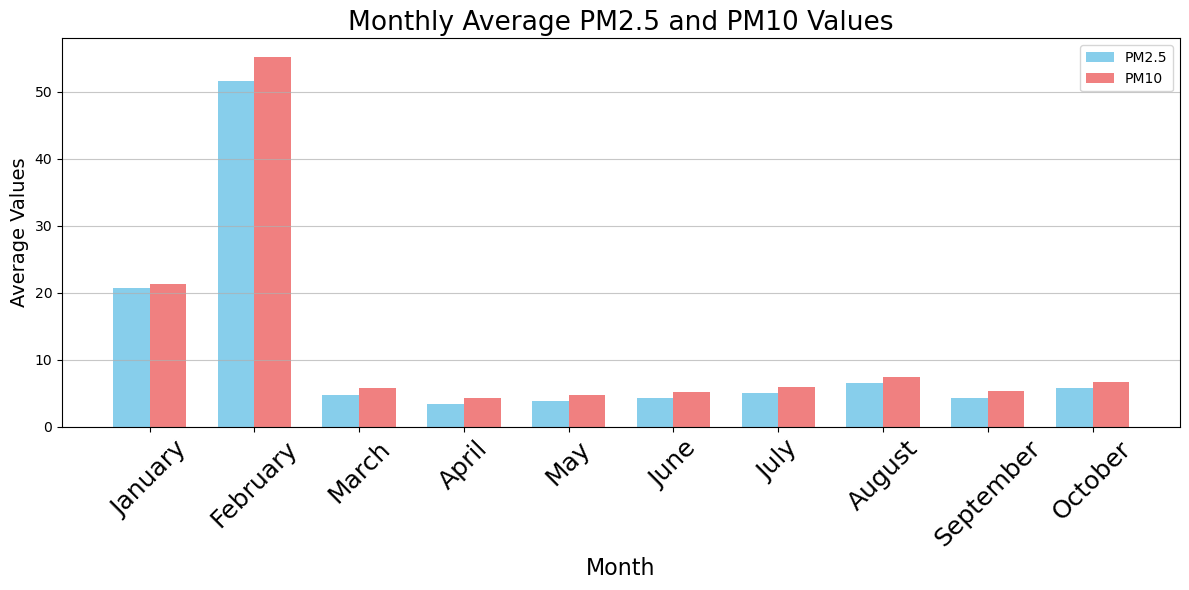

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(12, 6))
x = np.arange(len(monthly_means['Month']))  # X-axis positions
width = 0.35  # Width of the bars

# Plotting PM2.5 and PM10
plt.bar(x - width/2, monthly_means['pm25'], width, label='PM2.5', color='skyblue')
plt.bar(x + width/2, monthly_means['pm10'], width, label='PM10', color='lightcoral')

# Customizing the plot
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Values', fontsize=14)
plt.title('Monthly Average PM2.5 and PM10 Values', fontsize=19)
plt.xticks(x, monthly_means['Month'], rotation=45, fontsize = 18)
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
#plt.savefig('monthly_average_pm_values.jpg', format='jpg', dpi=300)  # Adjust dpi as needed
plt.show()






C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_15800\4111343434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuoco_data['Month'] = fuoco_data['timestamp(Europe/Rome)'].dt.strftime('%B')


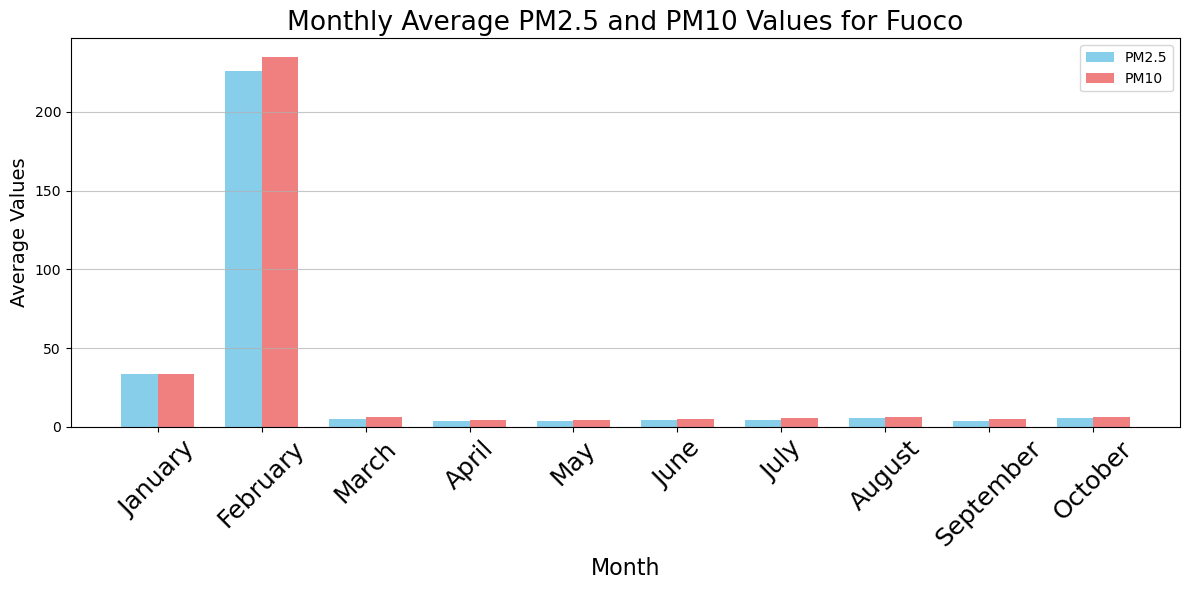

In [47]:
# Filter the DataFrame for 'Fuoco' room
fuoco_data = df[df['Room'] == 'Fuoco']

# Extract month from timestamp for Fuoco data
fuoco_data['Month'] = fuoco_data['timestamp(Europe/Rome)'].dt.strftime('%B')

# Calculate monthly averages for PM2.5 and PM10 for Fuoco
fuoco_monthly_means = fuoco_data.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

# Reorder the DataFrame based on the month order for Fuoco
fuoco_monthly_means['Month'] = pd.Categorical(fuoco_monthly_means['Month'], categories=month_order, ordered=True)
fuoco_monthly_means = fuoco_monthly_means.sort_values('Month')

# Create the plot for Fuoco
plt.figure(figsize=(12, 6))
x = np.arange(len(fuoco_monthly_means['Month']))  # X-axis positions
width = 0.35  # Width of the bars

# Plotting PM2.5 and PM10 for Fuoco
plt.bar(x - width/2, fuoco_monthly_means['pm25'], width, label='PM2.5', color='skyblue')
plt.bar(x + width/2, fuoco_monthly_means['pm10'], width, label='PM10', color='lightcoral')

# Customizing the plot for Fuoco
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Values', fontsize=14)
plt.title('Monthly Average PM2.5 and PM10 Values for Fuoco', fontsize=19)
plt.xticks(x, fuoco_monthly_means['Month'], rotation=45, fontsize = 18)
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


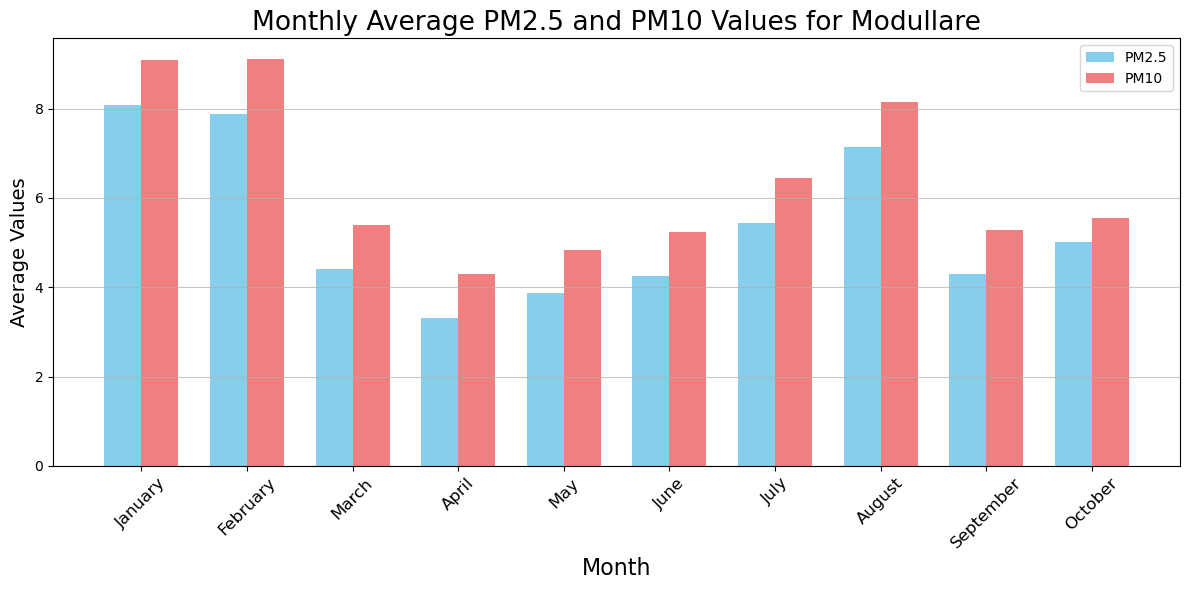

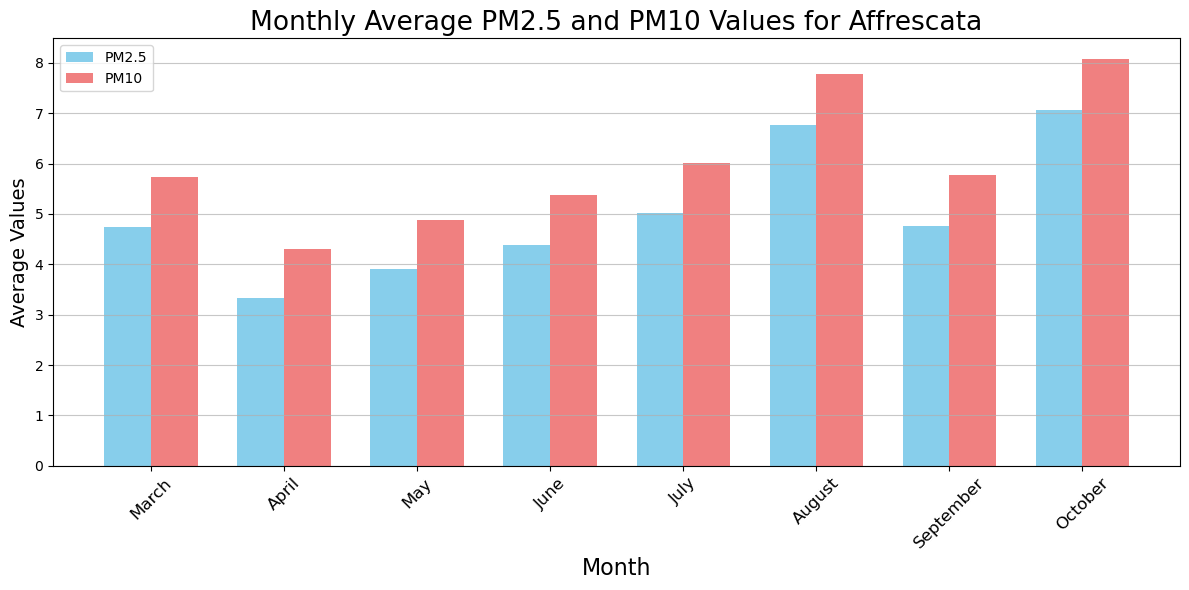

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract month from timestamp for the entire DataFrame
df['Month'] = df['timestamp(Europe/Rome)'].dt.strftime('%B')

# Define the rooms you want to analyze
rooms_to_analyze = ['Modullare', 'Affrescata']

for room in rooms_to_analyze:
    # Filter the DataFrame for the specific room
    room_data = df[df['Room'] == room]

    # Calculate monthly averages for PM2.5 and PM10 for the specific room
    monthly_means = room_data.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

    # Reorder the DataFrame based on the month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_means['Month'] = pd.Categorical(monthly_means['Month'], categories=month_order, ordered=True)
    monthly_means = monthly_means.sort_values('Month')

    # Create the plot for the specific room
    plt.figure(figsize=(12, 6))
    x = np.arange(len(monthly_means['Month']))  # X-axis positions
    width = 0.35  # Width of the bars

    # Plotting PM2.5 and PM10 for the specific room
    plt.bar(x - width/2, monthly_means['pm25'], width, label='PM2.5', color='skyblue')
    plt.bar(x + width/2, monthly_means['pm10'], width, label='PM10', color='lightcoral')

    # Customizing the plot for the specific room
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Average Values', fontsize=14)
    plt.title(f'Monthly Average PM2.5 and PM10 Values for {room}', fontsize=19)
    plt.xticks(x, monthly_means['Month'], rotation=45, fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.7)
    plt.tight_layout()

    # Save the figure as a JPG file
    plt.savefig(f'{room}_monthly_average_pm_values.jpg', format='jpg', dpi=300)  # Save with room name
    plt.show()

In [49]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract month from timestamp for the entire DataFrame
df['Month'] = df['timestamp(Europe/Rome)'].dt.strftime('%B')

# Define the rooms you want to analyze
rooms_to_analyze = ['Modullare', 'Affrescata']

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

for room in rooms_to_analyze:
    # Filter the DataFrame for the specific room
    room_data = df[df['Room'] == room]

    # Calculate monthly averages for PM2.5 and PM10 for the specific room
    monthly_means = room_data.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

    # Reorder the DataFrame based on the month order
    monthly_means['Month'] = pd.Categorical(monthly_means['Month'], categories=month_order, ordered=True)
    monthly_means = monthly_means.sort_values('Month')

    # Create the Plotly figure
    fig = go.Figure()

    # Add PM2.5 trace
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm25'],
        name='PM2.5',
        marker_color='skyblue'
    ))

    # Add PM10 trace
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm10'],
        name='PM10',
        marker_color='lightcoral'
    ))

    # Update layout
    fig.update_layout(
        title=f'Monthly Average PM2.5 and PM10 Values for {room}',
        xaxis_title='Month',
        yaxis_title='Average Values',
        barmode='group',
        xaxis=dict(categoryorder='array', categoryarray=month_order),  # Ensure correct month order
        template='plotly_white'
    )

    # Show the figure
    fig.show()

In [50]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract month from timestamp for the entire DataFrame
df['Month'] = df['timestamp(Europe/Rome)'].dt.strftime('%B')

# Define the rooms you want to analyze
rooms_to_analyze = ['Modullare', 'Affrescata']

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

for room in rooms_to_analyze:
    # Filter the DataFrame for the specific room
    room_data = df[df['Room'] == room]

    # Calculate monthly averages for PM2.5 and PM10 for the specific room
    monthly_means = room_data.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

    # Reorder the DataFrame based on the month order
    monthly_means['Month'] = pd.Categorical(monthly_means['Month'], categories=month_order, ordered=True)
    monthly_means = monthly_means.sort_values('Month')

    # Create the Plotly figure
    fig = go.Figure()

    # Add PM2.5 trace
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm25'],
        name='PM2.5',
        marker_color='skyblue'
    ))

    # Add PM10 trace
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm10'],
        name='PM10',
        marker_color='lightcoral'
    ))

    # Update layout with dark background and serious font style
    fig.update_layout(
        title=f'Monthly Average PM2.5 and PM10 Values for {room}',
        xaxis_title='Month',
        yaxis_title='Average Values',
        barmode='group',
        xaxis=dict(categoryorder='array', categoryarray=month_order),  # Ensure correct month order
        template='plotly_dark',  # Set dark background
        font=dict(
            family="Arial, sans-serif",  # Change to a more serious font
            size=14,
            color="white"  # Font color
        ),
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent plot background
        paper_bgcolor='rgba(0, 0, 0, 0)'   # Transparent paper background
    )

    # Show the figure
    fig.show()

In [51]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract month from timestamp for the entire DataFrame
df['Month'] = df['timestamp(Europe/Rome)'].dt.strftime('%B')

# Define the rooms you want to analyze
rooms_to_analyze = ['Modullare', 'Affrescata', 'Fuoco']

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

for room in rooms_to_analyze:
    # Filter the DataFrame for the specific room
    room_data = df[df['Room'] == room]

    # Calculate monthly averages for PM2.5 and PM10 for the specific room
    monthly_means = room_data.groupby('Month')[['pm25', 'pm10']].mean().reset_index()

    # Reorder the DataFrame based on the month order
    monthly_means['Month'] = pd.Categorical(monthly_means['Month'], categories=month_order, ordered=True)
    monthly_means = monthly_means.sort_values('Month')

    # Create the Plotly figure
    fig = go.Figure()

    # Add PM2.5 trace with a darker color
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm25'],
        name='PM2.5',
        marker_color='darkblue'  # Darker shade for PM2.5
    ))

    # Add PM10 trace with a darker color
    fig.add_trace(go.Bar(
        x=monthly_means['Month'],
        y=monthly_means['pm10'],
        name='PM10',
        marker_color='darkred'  # Darker shade for PM10
    ))

    # Update layout with dark background and serious font style
    fig.update_layout(
        title=f'Monthly Average PM2.5 and PM10 Values for {room}',
        xaxis_title='Month',
        yaxis_title='Average Values',
        barmode='group',
        xaxis=dict(categoryorder='array', categoryarray=month_order),  # Ensure correct month order
        template='plotly_dark',  # Set dark background
        font=dict(
            family="Arial, sans-serif",  # Change to a more serious font
            size=14,
            color="white"  # Font color
        ),
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent plot background
        paper_bgcolor='rgba(0, 0, 0, 0)'   # Transparent paper background
    )

    # Show the figure
    fig.show()

In [52]:
     import plotly
     print(plotly.__version__)

5.22.0


In [53]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Extract month from timestamp for filtering
df['Month'] = df['timestamp(Europe/Rome)'].dt.month

# Filter for the room "Fuoco" and for January (1) and February (2)
fuoco_data = df[(df['Room'] == 'Fuoco') & (df['Month'].isin([1, 2]))]

# Count values > 50 by week for both PM2.5 and PM10
week_stats = []
for week in sorted(fuoco_data['Week'].unique()):
    # Count for PM2.5
    pm25_high = fuoco_data[(fuoco_data['Week'] == week) & (fuoco_data['pm25'] > 50)].shape[0]
    
    # Count for PM10
    pm10_high = fuoco_data[(fuoco_data['Week'] == week) & (fuoco_data['pm10'] > 50)].shape[0]
    
    week_stats.append([f'Week {week}', pm25_high, pm10_high])

# Convert to DataFrame
week_df = pd.DataFrame(week_stats, columns=['Week', 'PM2.5', 'PM10'])

# Create the Plotly figure
fig = go.Figure()

# Add PM2.5 trace
fig.add_trace(go.Bar(
    x=week_df['Week'],
    y=week_df['PM2.5'],
    name='PM2.5',
    marker_color='royalblue'  # Color for PM2.5
))

# Add PM10 trace
fig.add_trace(go.Bar(
    x=week_df['Week'],
    y=week_df['PM10'],
    name='PM10',
    marker_color='indianred'  # Color for PM10
))

# Update layout with dark background
fig.update_layout(
    title='Count of High PM Values by Week for Fuoco (January and February)',
    xaxis_title='Week Number',
    yaxis_title='Number of Values > 50',
    barmode='group',
    template='plotly_dark',  # Set dark background
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"  # Font color
    )
)

# Show the figure
fig.show()

In [55]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Filter for the room "Fuoco" and for weeks 4 to 6
fuoco_data = df[(df['Room'] == 'Fuoco') & (df['Week'].isin([4, 5, 6]))]

# Count high PM2.5 and PM10 values (> 50)
pm25_high_count = fuoco_data[fuoco_data['pm25'] > 50].shape[0]
pm25_normal_count = fuoco_data[fuoco_data['pm25'] <= 50].shape[0]

pm10_high_count = fuoco_data[fuoco_data['pm10'] > 50].shape[0]
pm10_normal_count = fuoco_data[fuoco_data['pm10'] <= 50].shape[0]

# Data for PM2.5 pie chart
pm25_labels = ['High PM2.5 (> 50)', 'Normal PM2.5 (≤ 50)']
pm25_values = [pm25_high_count, pm25_normal_count]

# Data for PM10 pie chart
pm10_labels = ['High PM10 (> 50)', 'Normal PM10 (≤ 50)']
pm10_values = [pm10_high_count, pm10_normal_count]

# Create the PM2.5 pie chart
fig_pm25 = go.Figure(data=[go.Pie(labels=pm25_labels, values=pm25_values, hole=.3)])
fig_pm25.update_layout(title_text='Percentage of High PM2.5 Values in Fuoco (Weeks 4 to 6)', template='plotly_dark')

# Create the PM10 pie chart
fig_pm10 = go.Figure(data=[go.Pie(labels=pm10_labels, values=pm10_values, hole=.3)])
fig_pm10.update_layout(title_text='Percentage of High PM10 Values in Fuoco (Weeks 4 to 6)', template='plotly_dark')

# Show the figures
fig_pm25.show()
fig_pm10.show()

In [56]:
import pandas as pd

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Filter for the room "Fuoco" and for weeks 4, 5, and 6
fuoco_data = df[(df['Room'] == 'Fuoco') & (df['Week'].isin([4, 5, 6]))]

# Calculate total values for PM2.5 and PM10 for each week
total_values = fuoco_data.groupby('Week')[['pm25', 'pm10']].count().reset_index()

# Rename columns for clarity
total_values.columns = ['Week', 'Total PM2.5 Values', 'Total PM10 Values']

# Display the total values
print(total_values)

   Week  Total PM2.5 Values  Total PM10 Values
0     4                2016               1981
1     5                2016               1888
2     6                 941                908


In [57]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Filter for the room "Fuoco" and for weeks 4, 5, and 6
fuoco_data = df[(df['Room'] == 'Fuoco') & (df['Week'].isin([4, 5, 6]))]

# Calculate total values and outliers for PM2.5 and PM10
outlier_stats = []
for week in sorted(fuoco_data['Week'].unique()):
    total_pm25 = fuoco_data[fuoco_data['Week'] == week]['pm25'].count()
    total_pm10 = fuoco_data[fuoco_data['Week'] == week]['pm10'].count()
    
    outliers_pm25 = fuoco_data[(fuoco_data['Week'] == week) & (fuoco_data['pm25'] > 50)]['pm25'].count()
    outliers_pm10 = fuoco_data[(fuoco_data['Week'] == week) & (fuoco_data['pm10'] > 50)]['pm10'].count()
    
    outlier_stats.append([week, total_pm25, outliers_pm25, total_pm10, outliers_pm10])

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_stats, columns=['Week', 'Total PM2.5', 'Outliers PM2.5', 'Total PM10', 'Outliers PM10'])

# Create the bar chart
fig = go.Figure()

# Add PM2.5 bars
fig.add_trace(go.Bar(
    x=outlier_df['Week'],
    y=outlier_df['Total PM2.5'],
    name='Total PM2.5',
    marker_color='royalblue'
))

fig.add_trace(go.Bar(
    x=outlier_df['Week'],
    y=outlier_df['Outliers PM2.5'],
    name='Outliers PM2.5',
    marker_color='lightblue'
))

# Add PM10 bars
fig.add_trace(go.Bar(
    x=outlier_df['Week'],
    y=outlier_df['Total PM10'],
    name='Total PM10',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=outlier_df['Week'],
    y=outlier_df['Outliers PM10'],
    name='Outliers PM10',
    marker_color='lightcoral'
))

# Update layout
fig.update_layout(
    title='Outliers vs Total Values for PM2.5 and PM10 in Fuoco (Weeks 4 to 6)',
    xaxis_title='Week',
    yaxis_title='Count',
    barmode='group',
    template='plotly_dark',
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    )
)

# Show the figure
fig.show()

In [58]:
import pandas as pd

# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Filter for the room "Fuoco"
fuoco_data = df[df['Room'] == 'Fuoco']

# Get the data for the 5th week
week_5_data = fuoco_data[fuoco_data['Week'] == 5]

# Extract the unique dates for the 5th week
unique_dates_week_5 = week_5_data['timestamp(Europe/Rome)'].dt.date.unique()

# Display the unique dates
print("Dates of the 5th week for Fuoco PM10 and PM2.5 data:", unique_dates_week_5)

Dates of the 5th week for Fuoco PM10 and PM2.5 data: [datetime.date(2024, 1, 29) datetime.date(2024, 1, 30)
 datetime.date(2024, 1, 31) datetime.date(2024, 2, 1)
 datetime.date(2024, 2, 2) datetime.date(2024, 2, 3)
 datetime.date(2024, 2, 4)]


In [59]:
# Assuming df is your DataFrame with the necessary data
# Ensure 'timestamp(Europe/Rome)' is in datetime format
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'])

# Extract week number from timestamp
df['Week'] = df['timestamp(Europe/Rome)'].dt.isocalendar().week

# Filter for the room "Fuoco"
fuoco_data = df[df['Room'] == 'Fuoco']

# Get the data for the 4th, 5th and 6th weeks
week_4_data = fuoco_data[fuoco_data['Week'] == 4]
week_5_data = fuoco_data[fuoco_data['Week'] == 5]
week_6_data = fuoco_data[fuoco_data['Week'] == 6]

# Extract the starting and ending dates for the 4th, 5th and 6th weeks
start_date_week_4 = week_4_data['timestamp(Europe/Rome)'].dt.date.min()
end_date_week_4 = week_4_data['timestamp(Europe/Rome)'].dt.date.max()

start_date_week_5 = week_5_data['timestamp(Europe/Rome)'].dt.date.min()
end_date_week_5 = week_5_data['timestamp(Europe/Rome)'].dt.date.max()

start_date_week_6 = week_6_data['timestamp(Europe/Rome)'].dt.date.min()
end_date_week_6 = week_6_data['timestamp(Europe/Rome)'].dt.date.max()

# Display the starting and ending dates
print("Starting and ending dates of the 4th week for Fuoco PM10 and PM2.5 data:", start_date_week_4, end_date_week_4)
print("Starting and ending dates of the 5th week for Fuoco PM10 and PM2.5 data:", start_date_week_5, end_date_week_5)
print("Starting and ending dates of the 6th week for Fuoco PM10 and PM2.5 data:", start_date_week_6, end_date_week_6)


Starting and ending dates of the 4th week for Fuoco PM10 and PM2.5 data: 2024-01-22 2024-01-28
Starting and ending dates of the 5th week for Fuoco PM10 and PM2.5 data: 2024-01-29 2024-02-04
Starting and ending dates of the 6th week for Fuoco PM10 and PM2.5 data: 2024-02-05 2024-02-08


In [69]:
df = pd.read_excel('C:/Users/Jose Fernando Barros/Desktop/Dotta/sustainability/group project/data/Alldata_only.xlsx')

In [74]:
# Filtrar las filas donde Room es 'Affrescata'
df_affrescata = df[df['Room'] == 'Affrescata']

# Imprimir las primeras 5 columnas del nuevo dataframe
df_affrescata.head()


,timestamp(Europe/Rome),pm10,score,temp(¬∞F),humid,co2,voc,pm25,noise,light,Temperature in C,Room
29338,2024-03-04 14:35:00,4.3,38.6,70.1,44.7,739.0,7845.6,3.3,61.1,4.2,21.166667,Affrescata
29340,2024-03-04 14:40:00,3.1,46.6,70.5,44.0,737.1,2894.1,2.1,66.2,4.3,21.388889,Affrescata
29342,2024-03-04 14:45:00,3.1,63.7,71.0,43.5,738.9,1519.6,2.1,64.7,4.2,21.666667,Affrescata
29344,2024-03-04 14:50:00,3.3,69.4,71.3,43.6,748.1,1167.0,2.3,72.4,3.5,21.833333,Affrescata
29346,2024-03-04 14:55:00,3.6,72.5,71.9,43.1,767.2,967.0,2.6,70.5,3.6,22.166667,Affrescata


In [76]:
# Asegúrate de que timestamp esté en formato datetime
df['timestamp(Europe/Rome)'] = pd.to_datetime(df['timestamp(Europe/Rome)'], errors='coerce')
df = df.dropna(subset=['timestamp(Europe/Rome)'])

# Filtrar datos
fuoco_weeks_6_9 = df[(df['Room'] == 'Fuoco') & (df['Week'].isin([6, 7, 8, 9]))]

# Identificar outliers
pm10_outliers = fuoco_weeks_6_9[fuoco_weeks_6_9['pm10'] > 50]
pm25_outliers = fuoco_weeks_6_9[fuoco_weeks_6_9['pm25'] > 50]

# Graficar
plt.figure(figsize=(10, 5))

# Graficar outliers de pm10
plt.scatter(pm10_outliers['timestamp(Europe/Rome)'], pm10_outliers['pm10'], color='red', label='pm10 Outliers')
plt.plot(pm10_outliers['timestamp(Europe/Rome)'], pm10_outliers['pm10'], color='red', linestyle='--')

# Graficar outliers de pm25
plt.scatter(pm25_outliers['timestamp(Europe/Rome)'], pm25_outliers['pm25'], color='blue', label='pm25 Outliers')
plt.plot(pm25_outliers['timestamp(Europe/Rome)'], pm25_outliers['pm25'], color='blue', linestyle='--')

plt.title('Outliers for pm10 and pm25 in Fuoco Room (Weeks 6-9)')
plt.xlabel('Timestamp')
plt.ylabel('pm10 and pm25 Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Week'

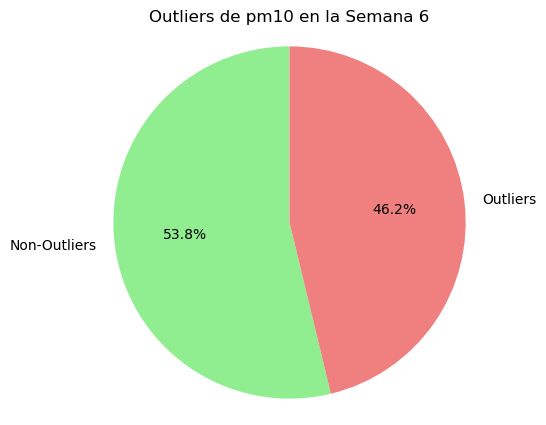

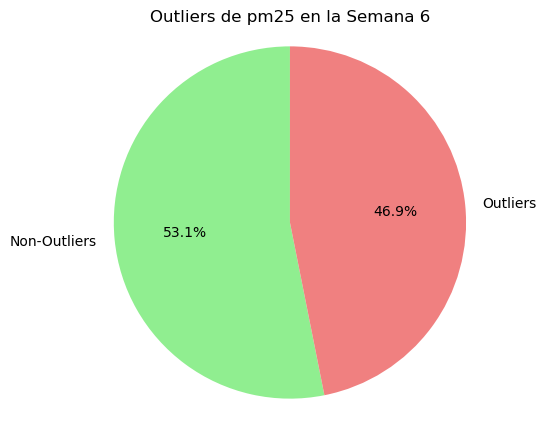

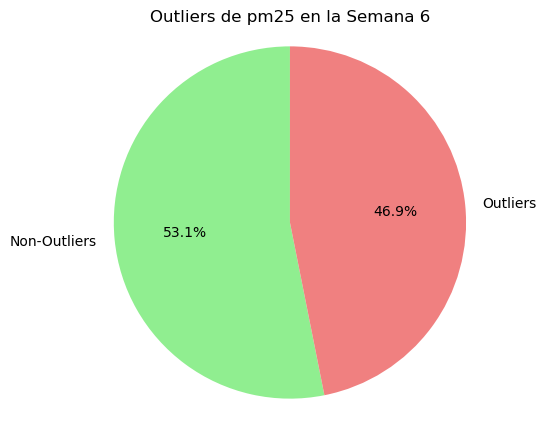

No hay datos disponibles para la semana 7 (pm10).
No hay datos disponibles para la semana 7 (pm25).
No hay datos disponibles para la semana 7 (pm25).
No hay datos disponibles para la semana 8 (pm10).
No hay datos disponibles para la semana 8 (pm25).
No hay datos disponibles para la semana 8 (pm25).
No hay datos disponibles para la semana 9 (pm10).
No hay datos disponibles para la semana 9 (pm25).
No hay datos disponibles para la semana 9 (pm25).


In [80]:
import matplotlib.pyplot as plt

# Función para generar un gráfico de pastel por semana
def plot_pie_chart(data, column, week):
    if data.empty:  # Verificar si hay datos para la semana
        print(f"No hay datos disponibles para la semana {week} ({column}).")
        return
    
    # Calcular outliers y no outliers
    outliers = len(data[data[column] > 50])
    non_outliers = len(data) - outliers
    
    # Datos para el gráfico
    labels = ['Non-Outliers', 'Outliers']
    sizes = [non_outliers, outliers]
    colors = ['lightgreen', 'lightcoral']
    
    # Crear el gráfico
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Outliers de {column} en la Semana {week}')
    plt.axis('equal')  # Asegurar que el gráfico sea circular
    plt.show()

# Iterar sobre las semanas 6, 7, 8 y 9
for week in [6, 7, 8, 9]:
    week_data = fuoco_weeks_6_9[fuoco_weeks_6_9['Week'] == week]
    
    # Gráficos de pm10
    plot_pie_chart(week_data, 'pm10', week)
    
    # Gráficos de pm25
    plot_pie_chart(week_data, 'pm25', week)

    # Gráfico de pm25
    plot_pie_chart(week_data, 'pm25', week)
